![](https://drive.google.com/uc?export=download&id=1VDvgu8jfPUoc3fHmkpkSLKZB3eRF-ZIl)





# Table of Contents
   [Abstract](#abstract)
1. [Introduction](#introduction)
    1. [Dataset Description](#dataset-description)
    2. [Task Objective](#task-objective)
    3. [Hypotheses](#hypotheses)
2. [Approach to Resolving the Problem](#approach-to-resolving-the-problem)
    1. [Problem Statement](#problem-statement)
    2. [Tools Used](#tools-used)
    3. [Variables](#variables)
    4. [Project Outline](#project-outline)
3. [Initial Data Exploration](#imports)
    1. [Imports](#library-initialization-preparing-for-data-analysis)
    2. [groundtruth_df](#groundtruth-df)
    3. [correlation analysis](#correlation-analysis)
    4. [participants_df](#participants-df)
4. [Data Cleaning and Preparation](#data-cleaning-and-preparation)
    1. [Data Cleaning](#data-cleaning)
      1. [Features](#features)
      2. [data type conversions](#data-type-conversions)
      3. [handling missing values and duplicates](#handling-missing-values-and-duplicates)
      4. [merge_df](#merge-df)
      5. [log_df](#log_df)
    2. [Exploratory Data Analysis (EDA)](#explortory-data-analysis-eda)
      1. [eda_df](#eda-df)
      2. [model_df](#model_df)
5. [Machine Learning Models](#machine-learning-models)
    1. [Models Selection and Rationale](#models-selection-and-rationale)
    2. [Train-test-validation Split](#train-test-validation-split)
    3. [Dimensionality reduction](#dimensionality-reduction)
    4. [Machine Learning Models](#machine-learning-models)
    5. [Neural Network Model](#neural-network-model)
6. [Interpretation and Visualisation of the Modelling Results](#interpretation-and-visualisation-of-the-modelling-results)
    1. [Machine Learning Model Evaluation](#machine-learning-model-evaluation)
    2. [Neural Network Model Evaluation](#neural-network-model-evaluation)
7. [Reflections on the Project](#reflections-on-the-project)
    1. [Hypotheses Evaluation based on project](#hypotheses-evaluation-based-on-project)
    2. [Reflection on Results](#reflection-on-results)
   [References](#references)




#Abstract
This project aims to predict click-through rates (CTR) on advertisements using machine learning models. The analysis focuses on how different features, such as ad type, ad position, query frequency, country frequency, and ad category, influence user interactions with ads. The primary objective is to identify which features most significantly impact CTR and optimise ad placements and formats accordingly.

The dataset used for this study includes various features related to user interactions with ads. Key features were encoded and used to train and evaluate three machine learning models: Logistic Regression, Random Forest, and Support Vector Classifier (SVC). Each model's performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score. GridSearchCV was employed to fine-tune hyperparameters and improve model performance.

The results indicated that query frequency and country frequency are the most influential features in predicting ad clicks. Ad category frequency also showed some importance, while ad position and ad type had a relatively lower impact. The Random Forest model achieved the highest accuracy, followed by the SVC and Logistic Regression models. However, all models showed moderate performance, indicating the complexity of predicting user behaviour based on the available features.

Visualisations, including ROC curves, confusion matrices, and feature importance plots, were used to interpret the model outcomes and understand the contribution of each feature. The analysis of these visualisations highlighted the potentially critical role of frequency-related features in driving ad clicks.

The project concludes that while ad type and position do affect CTR, their influence is likely less pronounced compared to query and country frequency. These findings suggest that optimising ad placements should prioritise understanding and leveraging query and country-specific user behaviours. Future research should explore additional features, such as user demographics and engagement metrics, to enhance model accuracy and provide deeper insights into ad performance. This project underscores the potential of machine learning in optimising digital advertising strategies and improving user engagement.


##Introduction

In online advertising, understanding user behavior and predicting their interaction with advertisements is crucial for advertisers to maximize the effectiveness of their campaigns. This task sets out to predict whether users will click on an advertisement based on their initial cursor movements on a website, with the aim of developing a model that can accurately forecast ad click-through rates. (The original data source is: https://gitlab.com/iarapakis/the-attentive-cursor-dataset.)

###Dataset Description


The dataset provided contains information about users' cursor movements on a website, along with whether or not they clicked on an advertisement. Specifically, we have access to cursor flow data for users who spent at least 5 seconds on the webpage, allowing us to delve into their initial interactions within this timeframe.


###Task Objective
The main objective of this task is to build a predictive model for the binary target variable, 'ad_clicked', indicating whether a user clicked on the advert during their visit to the website.

However, there are certain constraints and guidelines that must be adhered to:

* **Prediction Target:** The target variable for prediction is 'ad_clicked', which represents whether the user clicked on the ad or not.
* **Data Restrictions:** While building the predictive models, certain variables cannot be used.These include user demographic information such as 'user_id', 'education', 'age', 'income', 'gender', and 'attention'. Moreover, the data used for modeling must be filtered for users who spent at least 5 seconds on the webpage. From the log data available only the first 5 seconds of the cursor flow data can be used for predictions.

("the preceding discussion is adapted from output generated by ChatGPT")

###Hypotheses

**Hypothesis 1: Effect of Ad Type on Click-Through Rate**

**Hypothesis Statement:**
Native ads have a higher click-through rate (CTR) compared to display ads (dd).

**Rationale:**
- The type of ad presented to users can significantly impact their interaction with the ad. Native ads, which blend more seamlessly with the content, might appear less intrusive and more relevant, leading to higher engagement.
- Investigating the ad_type variable can help determine the effectiveness of different ad formats and guide decisions on which ad types to prioritize for maximizing CTR.

**Hypothesis 2: Influence of Ad Position on Click-Through Rate**

**Hypothesis Statement:**
Ads positioned at the top-left of the webpage have a higher click-through rate (CTR) compared to ads positioned at the top-right.

**Rationale:**
- The position of an ad on a webpage can impact its visibility and likelihood of being clicked. Users might pay more attention to ads placed in certain positions, such as the top-left, which is often a focal point on many websites.
- Investigating the ad_position variable can provide insights into the effectiveness of different ad placements, guiding decisions on optimal ad positioning to maximize CTR.

("the preceding discussion is adapted from output generated by ChatGPT")

##Approach to Resolving the Problem

###Problem Statement
The goal of this project is to develop a predictive model that can accurately determine whether a user will click on an advertisement based on their initial interactions and movements on a website. Specifically, the project focuses on analyzing user data such as cursor movements, session duration, ad stimulus (ad position, ad_type, ad_category, query), to predict ad clicks. Normally, demographics (age, gender, income, education) and attention levels could also be useful for predictions, however, as these variables are restricted for the model building, I will only consider them in the Exploratory Data Analysis stage. By understanding and predicting user behavior, we can aim to optimize ad placements, improve user experience, and increase the effectiveness of online advertising campaigns.


###Tools Used

**Python:**
Python is the most widely used programming language in data science. It has a wide range of libraries and frameworks that can be used specifically  for data science tasks. Python's syntax is widely considered simple and easily readable, thus making it accessible to individuals across varying proficiency levels. Additionally, it's compatibility with development environments such as Jupyter Notebooks, lends users such as myself flexibility to choose tools that align with my workflow preferences. (George, 2021)

**Pandas and Numpy:**

* **Pandas** is a Python library essential for data manipulation and analysis. It provides data structures like DataFrames that are ideal for handling and analyzing structured data. Pandas is used for cleaning, transforming, and aggregating data, making it easier to prepare the dataset for modeling. (Molin, 2021)

* **Numpy** provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. It is crucial for numerical computations and for operations that need to be performed on a large dataset efficiently. (Cakmak and Cuhadaroglu, 2018)

**Matplotlib and Seaborn:**

* **Matplotlib** is a foundational plotting library in Python that allows for the creation of "static, animated, and interactive visualizations." (Matplotlib, 2024) It is used to create detailed plots and graphs to visualize data insights and model performance.

* **Seaborn** is a library built on top of Matplotlib, that offers "a high-level interface for drawing attractive and informative statistical graphics." (Waskom, 2024) It is used for visualizing the distribution of data, correlation matrices, and other plots that help understanding the relationships between features.


**Scikit-learn:** is a Python module that integrates an wast array of cutting-edge machine learning algorithms tailored for medium-scale supervised and unsupervised tasks. By leveraging the robust Python ecosystem, Scikit-learn delivers top-tier implementations of numerous well-established machine learning algorithms. (Pedregosa et al., 2011)

* **Machine Learning Models:** Scikit-learn provides a wide range of machine learning algorithms and tools for model training, evaluation, and selection. It includes logistic regression, random forests, and support vector machines, which are essential for building and comparing different predictive models.(Hackeling, 2017)

* **Preprocessing Tools:** for standardizing and normalizing data, handling categorical variables, and feature selection. (Scikit-learn.Preprocessing, 2024)

* **Model Evaluation Metrics** like accuracy, precision, recall, F1-score, and ROC-AUC are provided to evaluate model performance. (Scikit-learn.ModelEvaluation, 2024)

* **Pipeline** facilitates the creation of reproducible workflows by chaining preprocessing steps and modeling steps together. (Scikit-learn.Pipeline, 2024)

**Imbalanced-learn:**

* **SMOTE** (Synthetic Minority Over-sampling Technique)is used to address class imbalance in the dataset. SMOTE generates synthetic samples for the minority class, which helps in training models that are robust and less biased towards the majority class. (N. V. Chawla et al., 2002)

**TensorFlow and Keras:**

* **Deep Learning:** TensorFlow and Keras are powerful tools for building and training neural networks. They provide high-level abstractions and flexibility to design custom deep learning models. (Databricks.TensorflowGuide, 2024)
* **Handling Large Datasets:** TensorFlow is optimized for performance and can handle large-scale data. It supports distributed training, which is crucial when dealing with extensive datasets.(Databricks.TensorflowGuide, 2024)
* **Sequential Data:** Keras provides easy-to-use APIs to create models that can capture patterns in sequential data, such as cursor movements over time. (Tensorflow.Keras, 2024)

**Keras-tuner:**

* **Hyperparameter Tuning:** Keras-tuner is used for optimizing the hyperparameters of neural network models. It automates the process of finding the best hyperparameters, improving model performance.

* **Random Search:** This tuner performs random search over specified hyperparameter ranges, which is computationally efficient and can lead to discovering optimal or near-optimal hyperparameter settings. (KerasTuner, 2024)

**Google Colab:** "is a hosted Jupyter Notebook service." (Colab.Google, 2024)

* **Computational Resources:** Google Colab provides free access to GPUs and TPUs, which significantly speeds up the training of deep learning models.

* **Integration with Google Drive:** Easy access to data stored in Google Drive, facilitating seamless data loading and saving. (Colab.Google, 2024)

**Jupyter Notebook** provides an interactive environment for data analysis, visualization, and model development. It allows for the iterative development and testing of code, making it easier to debug and refine the workflow.(Tharaneetharan M, 2024)

By leveraging these tools and technologies, the project ensures efficient data handling, robust model training, and effective evaluation of the predictive models, leading to better insights and more accurate predictions of user ad clicks based on the allowed variables.

("the preceding discussion is adapted from output generated by ChatGPT")

### Variables

* **participants.tsv** file
  * `user_id`: (string) Participant's ID.
  * `country`: (string) Participant's country, in ISO-3 format.
  * `education`: (int) Level of education, according to 6 bins (see table below).
  * `age`: (int) Participant's age, according to 9 bins (see table below).
  * `income`: (int) Level of income, according to 8 bins (see table below).
  * `gender`: (string) Participant's gender.
  * `ad_position`: (string) Ad stimulus position.
  * `ad_type`: (string) Ad stimulus type.
  * `ad_category`: (string) Ad stimulus category.
  * `serp_id`: (string) Ad SERP identifier.
  * `query`: (string) Ad stimulus query.
  * `log_id`: (string) Mouse tracking log ID.

| Bin | Education   | Age   | Income   |
  |-----|-------------|-------|----------|
  | 1   | High school | 18-23 | 25K      |
  | 2   | College     | 24-29 | 25-34K   |
  | 3   | Bachelor's  | 30-35 | 35-49K   |
  | 4   | Graduate    | 36-41 | 50-74K   |
  | 5   | Master's    | 42-47 | 75-99K   |
  | 6   | Doctorate   | 48-53 | 100-149K |
  | 7   |             | 54-59 | 150-249K |
  | 8   |             | 60-65 | +250K    |
  | 9   |             |   +66 |          |



* **groundtruth.tsv** file
  * `user_id`: (string) Participant's ID.
  * `ad_clicked`: (int) Whether the participant clicked on the ad (1) or not (0).
  * `attention`: (int) Self-reported attention score, in 1-5 Likert-type scale (1 denotes no attention).
  * `log_id`: (string) Mouse tracking log ID.

* The **logs/** folder _has all the log files, as recorded by the evtrack software.
Here you can find space-delimited files (CSV) with information about each event type
and XML files with information about the user’s browser metadata (e.g. viewport size, user agent string). (Note: For events that do not relate to any mouse event (e.g. load or blur), the xpos and ypos column values are 0.)
 Each CSV file has 8 columns:_
  * `cursor`: (int) This column is always 0 because all participants used a regular * computer mouse.
  * `timestamp`: (int) Timestamp of the event, with millisecond precision.
  * `xpos`: (float) X position of the mouse cursor.
  * `ypos`: (float) Y position of the mouse cursor.
  * `event`: (string) Browser's event name; e.g. load, mousemove, click, etc.
  * `xpath`: (string) Target element that relates to the event, in XPath notation.
  * `attrs`: (string) Optional. Element attributes, if any.
  * `extras`: (string) Optional. A JSON string with Euclidean distances to different reference points of the ad's bounding box.

  (Leiva and Arapakis, 2020)


###Project Outline
I employ a structured approach to completing the task:
1. **Initial Data Exploration:** Understand the dataset by examining its structure, summary statistics, and visualizing distributions.
2. **Data Cleaning and Filtering:** Filter the data to include only meaningful interactions, such as users who interacted with the site for a minimum of 5 seconds.
3. **EDA and Feature Selection and Engineering:** Select relevant features and engineer new ones to improve model performance.
4. **Model Training:** Train various machine learning models to identify the best-performing model.
5. **Model Evaluation:** Evaluate the models using appropriate metrics.
6. **Result Visualization:** Visualize the results to interpret the model's performance and insights.
7. **Challenges and Learning Outcomes:** Discuss any challenges faced and what was learned during the process.
8. **Conclusions and Recommendations:** Summarize key findings and suggest recommendations for further research.

#Initial Data Exploration

The dataset to be used consists of two tab-separated values (tsv) files and a folder containing the log files in comma-separated value (csv) file format.

In [ ]:
# @title Imports

In [ ]:
!pip install keras-tuner

I start with loading the required libraries. I keep them in one cell in my file, for easier navigation as I proceed in my project.

In [ ]:
# Loading required libraries

import pandas as pd
import numpy as np
import os
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras_tuner.tuners import RandomSearch
from keras_tuner import HyperParameters
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier



As I am using Google Colab because it allows me to include code, visualisations and text within one document and facilitates the loading of the log data also from my Drive, I chose to load my data using the mount Google Drive option.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read tsv files
groundtruth_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1TLeVhRnpVIipq-c2uWX7qGi5EhNa4DQh", sep='\t')
participants_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1e2bVhCQ6JTqlAA6eOUl3qU5UwJ8GGSi4", sep='\t')

In [ ]:
# @title groundtruth_df
groundtruth_df.info()
groundtruth_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     2909 non-null   object
 1   ad_clicked  2909 non-null   int64 
 2   attention   2909 non-null   int64 
 3   log_id      2909 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 91.0+ KB


,user_id,ad_clicked,attention,log_id
0,5npsk114ba8hfbj4jr3lt8jhf5,0,4,20181002033126
1,5o9js8slc8rg2a8mo5p3r93qm0,1,5,20181001211223
2,pi17qjfqmnhpsiahbumcsdq0r6,0,4,20181001170952
3,3rptg9g7l83imkbdsu2miignv7,0,1,20181001140754
4,049onniafv6fe4e6q42k6nq1n2,0,1,20181001132434


The groundtruth DataFrame (df) contains information about users and their interactions with ads on a website.

**Data Structure:**

The `groundtruth_df` consists of 2909 entries and 4 columns. Each row represents a user's interaction with an ad.
The columns are:
- `user_id`: Unique identifier for each user (object type).
- `ad_clicked`: Binary variable indicating whether the user clicked on the ad (0 for no, 1 for yes).
- `attention`: Numeric variable representing the level of attention the user paid to the ad.
- `log_id`: Unique identifier for each log entry (int64 type).

**Data Types:**
- `user_id` column is of object type (string), likely representing text.
- `ad_clicked` and `attention` columns are of int64 type, indicating they are numerical variables.
- `log_id` column is also of int64 type, representing unique log identifiers.

**Missing Values:**
There are no missing values in any of the columns, as  the "Non-Null Count" for each column is equal to the total number of entries (2909).

**Summary Statistics:**

Since `user_id` and `log_id` are identifiers, summary statistics are not applicable to these columns.
- `ad_clicked`, indicates whether the user clicked on the ad (0 for no, 1 for yes). We can calculate the click-through rate based on this column.
- For `attention`, we can compute summary statistics such as mean, median, minimum, and maximum to understand the distribution of attention levels.

Overall, this df provides information about user interactions with ads, including whether they clicked on the ad and their attention levels. Further analysis could involve exploring relationships between variables, visualizing the data, and building predictive models to understand factors influencing ad clicks.

("the preceding discussion is adapted from output generated by ChatGPT")


ad_clicked
0    2164
1     745
Name: count, dtype: int64


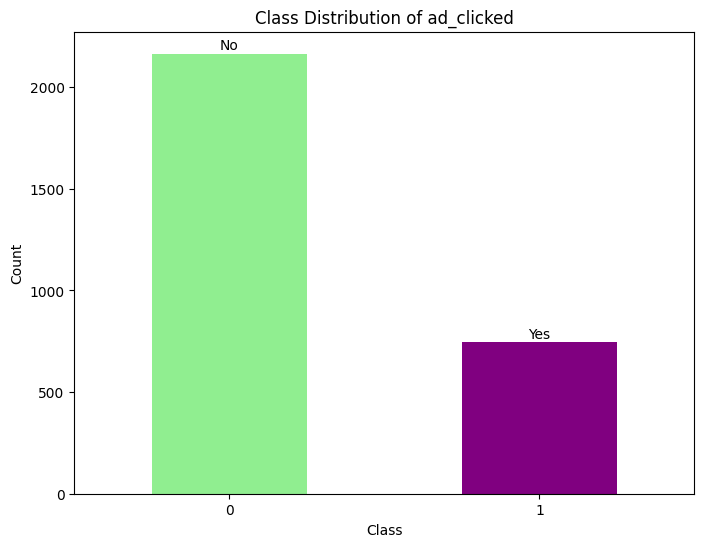

In [ ]:
# ad_clicked distribution

# Assuming 'target_column' is the column containing the class labels
ad_clicked_distribution = groundtruth_df['ad_clicked'].value_counts()

# Print the class distribution
print(ad_clicked_distribution)

# Plotting the class distribution of ad_clicked
plt.figure(figsize=(8, 6))
ad_clicked_distribution.plot(kind='bar', color=['lightgreen', 'purple']) # Visualisation colour amended following personal communication (p.c.) with Zsofia Gyarmathy
plt.title('Class Distribution of ad_clicked')
plt.xlabel('Class')
plt.ylabel('Count')

# Add labels for 0 and 1
plt.text(0, ad_clicked_distribution[0] + 5, 'No', ha='center', va='bottom')
plt.text(1, ad_clicked_distribution[1] + 5, 'Yes', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

# this code was adapted from code generated by Chat GPT and (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html, 2024)

The visualisation shows the class distribution of the ad_clicked feature.

**Class Distribution:**
The ad_clicked feature has two classes: 0 (No) and 1 (Yes).
The count of class 0 (No) is 2164.
The count of class 1 (Yes) is 745.

**Imbalance:**
The data is imbalanced with a higher proportion of class 0 (No) compared to class 1 (Yes).

**Visualization:** The bar chart visually represents the imbalance, with the green bar (No) being significantly taller than the purple bar (Yes).

**Implications for Modeling:**

This imbalance might affect the performance of machine learning models, especially if the model is biased towards the majority class.
Techniques to handle imbalanced data include:
- Resampling: Adjusting the dataset to balance the class distribution.
 - Oversampling: Increasing the number of samples in the minority class.
 - Undersampling: Decreasing the number of samples in the majority class.
- Evaluation Metrics: Using metrics that provide a better understanding of model performance on imbalanced data.
 - Precision
 - Recall
 - F1-score
 - Instead of relying solely on accuracy.
- Specialized Algorithms: Applying algorithms designed to handle imbalanced datasets effectively.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# overall ad_clicked rate
# Calculate the total number of ad clicks
total_ad_clicks = groundtruth_df['ad_clicked'].sum()

# Calculate the total number of users
total_users = len(groundtruth_df)

# Calculate the overall ad click rate
overall_click_rate = total_ad_clicks / total_users

print("Overall Ad Click Rate:", overall_click_rate)

Overall Ad Click Rate: 0.2561017531797869


The overall ad click rate is approximately 25.61%. This means that out of all the users in the dataset, approximately 25.61% of them clicked on an ad.

In [ ]:
# ad_clicked rate by attention
# Group the DataFrame by the 'attention' column and calculate the ad click rate for each attention level
ad_click_rate_by_attention = groundtruth_df.groupby('attention')['ad_clicked'].mean()

# Print the result
print(ad_click_rate_by_attention)

attention
1    0.118081
2    0.156436
3    0.308901
4    0.264652
5    0.336471
Name: ad_clicked, dtype: float64


This output represents the ad click rate for each level of attention:

Attention Level 1: approx. 11.81%.

Attention Level 2: approx. 15.64%.

Attention Level 3: approx. 30.89%.

Attention Level 4: approx. 26.47%.

Attention Level 5: approx. 33.65%.

This analysis provides insights into the relationship between the level of user attention and the likelihood of clicking on an ad. It suggests that users with higher attention levels are more likely to click on ads compared to those with lower attention levels. However, this is not going to be a feature in our model.

("the preceding discussion is adapted from output generated by ChatGPT")


ad_clicked
0    3.474584
1    3.963758
Name: attention, dtype: float64


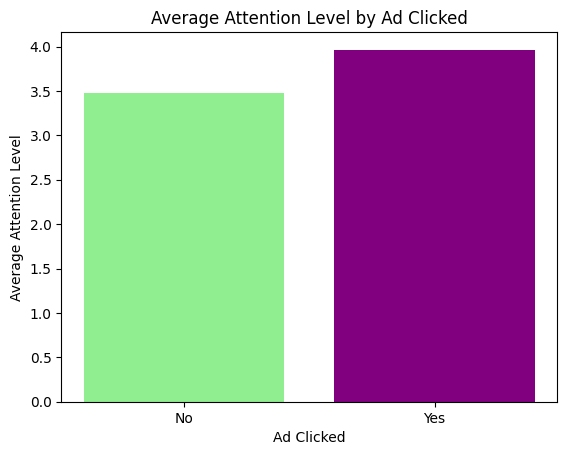

In [ ]:
# average attention by ad_clicked
# Group the data by 'ad_clicked' and calculate the average attention level for each group
average_attention_by_ad_click = groundtruth_df.groupby('ad_clicked')['attention'].mean()
print(average_attention_by_ad_click)

# Plotting
plt.bar(average_attention_by_ad_click.index, average_attention_by_ad_click.values, color=['lightgreen', 'purple'])
plt.xlabel('Ad Clicked')
plt.ylabel('Average Attention Level')
plt.title('Average Attention Level by Ad Clicked')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html, 2024)
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html, 2024)

The visualisation shows a bar chart representing the average attention level by whether an ad was clicked or not.

**Average Attention Level:** The chart compares the average attention levels for two groups: those who did not click the ad (No) and those who did click the ad (Yes).
The average attention level for the "No" group is slightly below 3.5.
The average attention level for the "Yes" group is exactly 4.

**Comparison:**
The average attention level is slightly higher for individuals who clicked the ad (Yes) compared to those who did not click the ad (No).
This suggests that individuals with higher attention levels are more likely to click on ads.

**Implications for Targeting:**
This insight can be useful for targeting advertisements. Increasing the attention level of potential customers might increase the likelihood of them clicking on ads.
It might also imply that ads that are more engaging and capture the attention of viewers are more effective.

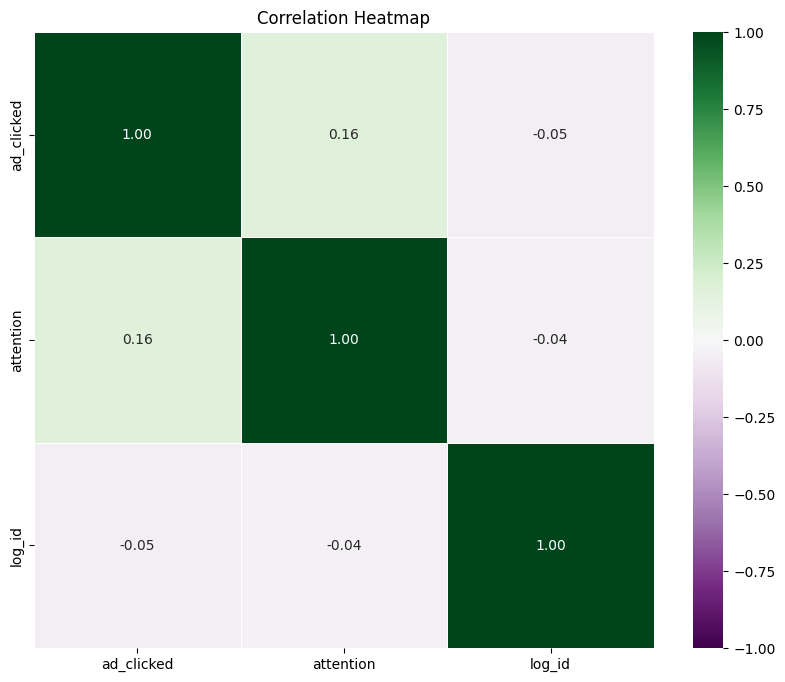

In [ ]:
# @title correlation analysis
# Select only numeric columns for correlation analysis
numeric_columns = groundtruth_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation coefficients
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn',vmin=-1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# (Seaborn.Heatmap, 2024)

The visualization is a **correlation heatmap** showing the relationships between three variables: `ad_clicked`, `attention`, and `log_id`.

**Correlation Values:**
- `ad_clicked` and `attention`: The correlation coefficient is 0.16, indicating a positive but weak correlation. This means that as the attention level increases, the likelihood of clicking an ad slightly increases.
- `ad_clicked` and `log_id`: The correlation coefficient is -0.05, indicating a very weak negative correlation. This suggests that there is almost no relationship between `log_id` and whether an ad was clicked.
- `attention` and `log_id`: The correlation coefficient is -0.04, also indicating a very weak negative correlation. This means there is almost no relationship between attention level and `log_id`.

**Diagonal Elements:**
The diagonal elements have a correlation coefficient of 1.00 because each variable is perfectly correlated with itself.

**Implications:**
- The weak positive correlation between `ad_clicked` and `attention` aligns with the previous bar chart analysis, indicating that higher attention levels are slightly associated with a higher probability of clicking on ads.
- The weak correlations between `log_id` and the other variables (`ad_clicked` and `attention`) suggest that `log_id` does not have a meaningful relationship with the other two variables in this dataset.


Although the `attention` feature is not allowed for the model building, I chose to explore its relationship with `ad_clicked`, to get a better understanding of the df.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# @title participants_df
participants_df.info()
participants_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      2909 non-null   object
 1   country      2909 non-null   object
 2   education    2909 non-null   object
 3   age          2909 non-null   object
 4   income       2909 non-null   object
 5   gender       2909 non-null   object
 6   ad_position  2909 non-null   object
 7   ad_type      2909 non-null   object
 8   ad_category  2909 non-null   object
 9   serp_id      2909 non-null   object
 10  query        2909 non-null   object
 11  log_id       2909 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 272.8+ KB


,user_id,country,education,age,income,gender,ad_position,ad_type,ad_category,serp_id,query,log_id
0,5npsk114ba8hfbj4jr3lt8jhf5,PHL,3,3,1,male,top-left,dd,Computers & Electronics,tablets,tablets,20181002033126
1,5o9js8slc8rg2a8mo5p3r93qm0,VEN,3,1,1,male,top-right,dd,Shop - Luxury Goods,casio-watches,casio watches,20181001211223
2,pi17qjfqmnhpsiahbumcsdq0r6,VEN,2,3,1,male,top-left,native,Shop - Luxury Goods,chivas-regal,chivas regal,20181001170952
3,3rptg9g7l83imkbdsu2miignv7,VEN,3,2,1,male,top-right,dd,Shop - Luxury Goods,chivas-regal,chivas regal,20181001140754
4,049onniafv6fe4e6q42k6nq1n2,VEN,3,5,1,male,top-left,native,Autos & Vehicles,audi-r8-used,audi r8 used,20181001132434


The `participants_df` DataFrame contains information about users and their interactions with ads on a website.

Here's a breakdown of the columns:

- `user_id`: Unique identifier for each user.
- `country`: Country of the user.
- `education`: Education level of the user (according to bins, see Variables).
- `age`: Age of the user (according to bins, see Vriables).
- `income`: Income level of the user (according to bins, see Variables).
- `gender`: Gender of the user.
- `ad_position`: Position of the ad on the webpage.
- `ad_type`: Type of ad.
- `ad_category`: Category of the advertised product or service.
- `serp_id`: Identifier for the search engine results page.
- `query`: Search query used by the user.
- `log_id`: Unique identifier for each log entry.

It appears that most of the columns contain categorical data, except for the `log_id` column, which seems to be numeric. The `education`, `age`, and `income` columns are also expected to be numerical, but they are encoded as object (string) data types.

("the preceding discussion is adapted from output generated by ChatGPT")

#Data Cleaning and Preparation

###Data Cleaning

To better understand this dataset and perform meaningful analysis we need to convert the columns to the correct data types. In order to help decide which conversion to use I decided to check the number of unique values in each categorical column.

In [ ]:
# Filter columns with object dtype
object_cols = participants_df.select_dtypes(include=['object'])

# Count unique values in each object column
unique_counts = object_cols.nunique()

# Print the number of unique values for each object column
print(unique_counts)

# code changed from iterative approach to pandas vectorized approach on suggestion of Zsofia Gyarmathy
# this code was adapted from code generated by Chat GPT

user_id        2909
country          69
education         7
age              10
income            9
gender            3
ad_position       2
ad_type           2
ad_category      14
serp_id          63
query            55
dtype: int64


**`user_id`:** This is likely an identifier and should remain as an object (string) data type.

**`education`, `age` and `income`** will be converted to numeric values.

**`gender`** contains three unique values, therefore I decided to inspect these unique values further.


####Features

In [ ]:
# gender distribution
# Count the occurrences of each unique value in the 'gender' column
gender_counts = participants_df['gender'].value_counts()

# Print the name and count of each unique value
print(gender_counts)

gender
male      1713
female    1182
na          14
Name: count, dtype: int64


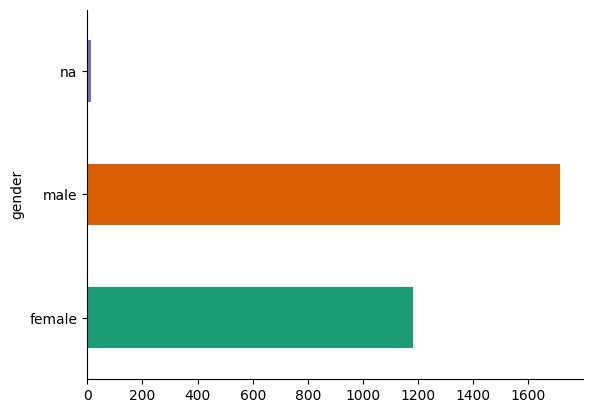

In [ ]:
# Visualisation
participants_df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
# this code was adapted from code generated by Chat GPT

There are 14 counts of 'na' values in my `gender` column and I decided to impute male and female in a way so as to maintain the original proportions. This value is not going to be used for the predictive model, but it can be used for EDA. The `gender` distribution is imbalanced in favour of the male classs.

In [ ]:
# Calculate the proportion of 'male' and 'female' values
male_count = gender_counts.get('male', 0)
female_count = gender_counts.get('female', 0)
total_count = male_count + female_count

# Calculate the proportion of 'male' and 'female' values
male_proportion = male_count / total_count
female_proportion = female_count / total_count

# Impute 'na' values based on the existing proportions
na_count = gender_counts.get('na', 0)
imputed_male_count = round(male_proportion * na_count)
imputed_female_count = round(female_proportion * na_count)

# Replace 'na' values with imputed values directly in the 'participants_df' DataFrame
participants_df.loc[participants_df['gender'] == 'na', 'gender'] = ['male'] * imputed_male_count + ['female'] * imputed_female_count

# Count the occurrences of each unique value in the 'gender' column
gender_counts = participants_df['gender'].value_counts()

# Print the name and count of each unique value
print(gender_counts)

# this code was adapted from code generated by Chat GPT

gender
male      1721
female    1188
Name: count, dtype: int64


The output shows that the imputation was successful as 'na' no longer appears as a unique value.

Next I decided to inspect the data in the `education`, `age` and `income` columns. These have object datatype despite the apparent numeric values. These will have to be converted to a numeric data type.

In [ ]:
# education distribution
# Count the occurrences of each unique value in the 'gender' column
education_counts = participants_df['education'].value_counts()

# Print the name and count of each unique value
print(education_counts)

education
3     743
1     629
4     531
2     514
5     414
na     47
6      31
Name: count, dtype: int64


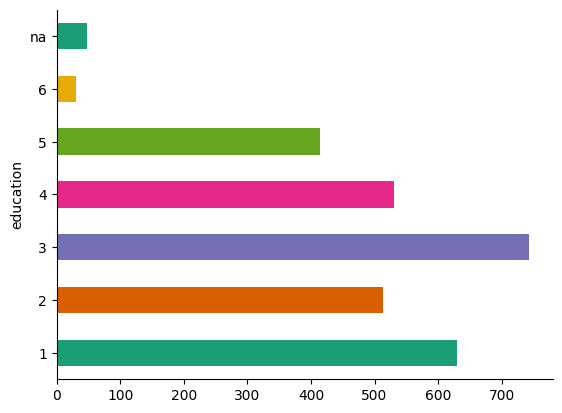

In [ ]:
# Visualisation of education distribution
participants_df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The bar plot illustrates the distribution of the education variable.

**Observations:**
- Education levels range from 1 to 6, with an additional 'na' category for missing values.
- The most common education level is 3, followed by 1 and 4.
- There are fewer participants with education levels 6 and 'na'.

**Insights:**
- The data shows a variety of education levels, including some missing values denoted by 'na'.
- The imbalance in the distribution could impact the model's performance if education is a significant predictor.
- Handling the 'na' values may be necessary, potentially through imputation or exclusion.


In [ ]:
# age distribution
# Count the occurrences of each unique value in the 'gender' column
age_counts = participants_df['age'].value_counts()

# Print the name and count of each unique value
print(age_counts)

age
2     753
3     626
4     441
1     413
5     234
6     189
7     140
8      68
9      25
na     20
Name: count, dtype: int64


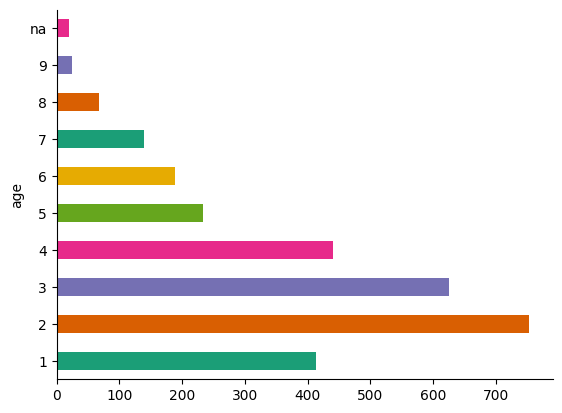

In [ ]:
# Visualisation of age distribution
participants_df.groupby('age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The bar plot illustrates the distribution of the age variable.

**Observations:**
- Age levels range from 1 to 9, with an additional 'na' category for missing values.
- The most common age levels are 2 and 3, followed by 1 and 4.
- Age levels 8 and 9, as well as 'na', have the fewest participants.

**Insights:**
- There is a skew towards younger age groups, with age levels 1, 2, and 3 being more prevalent.
- Proper handling of the 'na' values is essential to maintain the integrity of the analysis.
- The age distribution suggests that the user base may be predominantly younger, which could influence ad click behavior.

In [ ]:
# income distrbution
# Count the occurrences of each unique value in the 'gender' column
income_counts = participants_df['income'].value_counts()

# Print the name and count of each unique value
print(income_counts)

income
1     1011
2      457
4      401
3      373
5      252
na     202
6      146
7       44
8       23
Name: count, dtype: int64


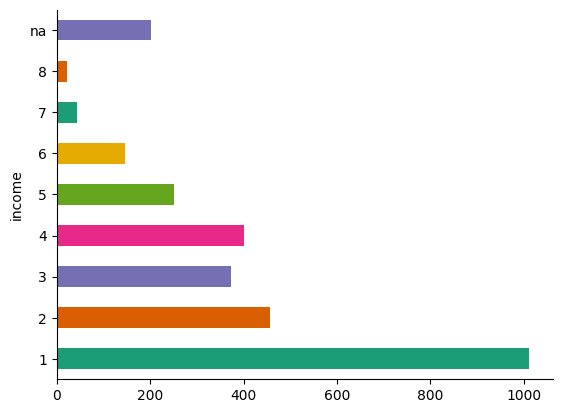

In [ ]:
# Visualisation of income distribution
participants_df.groupby('income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The bar plot illustrates the distribution of the income variable.

**Observations:**
- Income levels range from 1 to 8, with an additional 'na' category for missing values.
- The majority of participants are in income level 1, followed by levels 2 and 3.
- Higher income levels (6, 7, 8) have fewer participants.

**Insights:**
- There is a significant skew towards lower income levels.
- The large number of participants in income level 1 might dominate the model's learning process.
- It is important to handle the 'na' values, potentially through imputation based on the distribution of the existing data.

There are 'na' values in the `education`, `age` and `income` columns which I am going to have to deal with after the data type conversions.

**Recommendations for Handling Data Issues**

Handling Missing Values:
- **`education`, `age`, and `income`:** Use imputation strategies based on the proportion of existing values to fill in the 'na' values. For instance, impute the missing values proportionally to maintain the distribution of the data.

Dealing with Imbalance:
- **`income`:** Consider employing techniques like resampling (oversampling/undersampling) or adding weight to the less represented classes to balance the model's learning.

Visualization and Exploration:
- **Further Analysis:** Conduct additional exploratory data analysis (EDA) to identify any other potential issues or patterns in the data.
- **Correlations:** Examine correlations between features and the target variable to guide feature selection and engineering efforts.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# ad_category distrbution
# Count the occurrences of each unique value in the 'ad_category' column
ad_category_counts = participants_df['ad_category'].value_counts()

# Print the name and count of each unique value
print(ad_category_counts)

ad_category
Computers & Electronics           805
Shop - Apparel                    479
Shop - Luxury Goods               440
Travel                            231
Shop - Sporting Goods             213
Shop - Photo & Video Services     207
Shop - Toys                       126
Games                             110
Shop - Wholesalers & Liquidatr     87
Shop - Event Ticket Sales          76
Autos & Vehicles                   62
Shop - Gifts & Special Event       38
Food & Drink                       18
Real Estate                        17
Name: count, dtype: int64


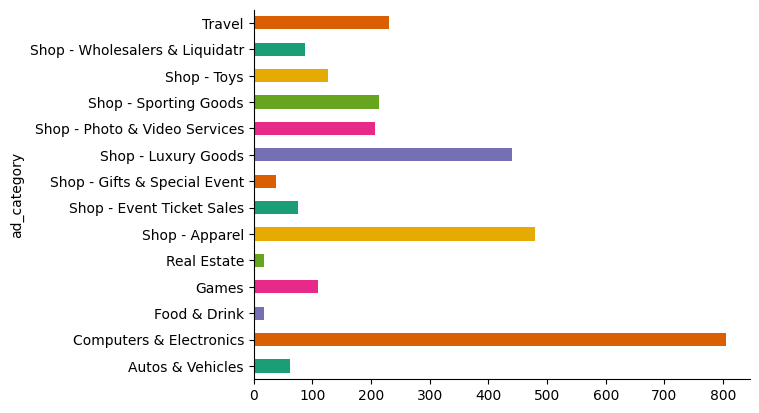

In [ ]:
# Visualisation of ad_category distribution
participants_df.groupby('ad_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Observations:**

- **Shop - Apparel:** This category stands out with a significant number of ads, indicating its popularity among advertisers.
- **Computers & Electronics:** With the highest number of ads, this category suggests a strong presence of technology-related advertisements.
- **Shop - Luxury Goods:** Another major category, demonstrating a substantial number of ads targeting luxury products.
- **Shop - Toys, Shop - Sporting Goods, Shop - Photo & Video Services:** These categories show a moderate number of ads, suggesting a balanced level of advertisement focus.
- **Shop - Gifts & Special Event, Real Estate:** These categories exhibit the fewest ads, indicating a comparatively lower emphasis on these types of products.
- **Travel, Games, Food & Drink, Autos & Vehicles:** These categories show varied numbers of ads but are not as prominent as the top categories in terms of advertisement frequency.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# Group categories that start with "Shop" into one category
participants_df.loc[participants_df['ad_category'].str.startswith('Shop'), 'ad_category'] = 'Shop - All'

# Count the occurrences of each unique value in the modified 'ad_category' column
ad_category_counts = participants_df['ad_category'].value_counts()

# Print the name and count of each unique value
print(ad_category_counts)


ad_category
Shop - All                 1666
Computers & Electronics     805
Travel                      231
Games                       110
Autos & Vehicles             62
Food & Drink                 18
Real Estate                  17
Name: count, dtype: int64


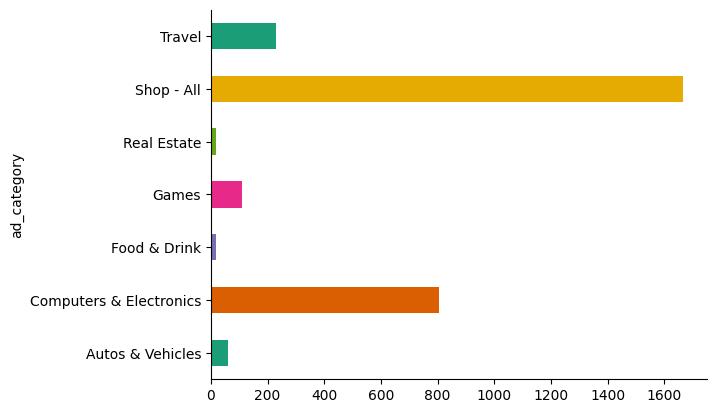

In [ ]:
# Visualisation of grouped ad_category distribution
participants_df.groupby('ad_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

- **Shop - All:** This new category, which groups all shopping-related categories, has the highest number of ads by far. This aggregation demonstrates the overall dominance of shopping-related ads.
- **Computers & Electronics:** This category remains the second most prevalent, indicating a strong focus on technology-related products.
- **Travel:** This category has fewer ads compared to shopping and technology but still maintains a noticeable presence.
- **Games, Food & Drink, Autos & Vehicles, Real Estate:** These categories have fewer ads, indicating a lower emphasis compared to shopping and technology categories.

("the preceding discussion is adapted from output generated by ChatGPT")

Next I decided to inspect the `country`, `serp_id` and `query` columns, as these had a high number of unique values, which has significant implications in terms of encoding applied.

In [ ]:
# country
# Count the occurrences of each unique value in the 'country' column
country_counts = participants_df['country'].value_counts()

# Initialize an empty list to store the strings
country_count_strings = []

# Print all unique values and their counts in a list format
for country, count in country_counts.items():
    country_count_strings.append(f"{country}: {count}")

# Join the strings with commas and print
print(", ".join(country_count_strings))

# this code was adapted from code generated by Chat GPT

USA: 1768, VEN: 368, GBR: 209, CAN: 77, EGY: 38, UKR: 31, DEU: 30, TUR: 29, IND: 29, SRB: 27, RUS: 26, IDN: 21, BRA: 18, ESP: 15, PHL: 14, MEX: 14, ITA: 13, SAU: 11, VNM: 9, NLD: 8, GRC: 8, SWE: 7, MKD: 7, COL: 7, BGD: 7, DZA: 7, AUS: 7, MDA: 7, ARG: 7, ROU: 6, POL: 6, PER: 5, PAK: 5, BGR: 5, HRV: 5, BEL: 4, AUT: 4, NGA: 4, FRA: 4, MAR: 3, TUN: 3, BIH: 3, NPL: 2, CHE: 2, LKA: 2, QAT: 2, na: 2, PRT: 2, DOM: 1, CHN: 1, ISR: 1, KOR: 1, KEN: 1, HKG: 1, SVN: 1, ZAF: 1, TWN: 1, IRL: 1, CZE: 1, CYP: 1, SGP: 1, LTU: 1, CHL: 1, ECU: 1, BOL: 1, DNK: 1, MYS: 1, KWT: 1, HUN: 1


In [ ]:
# serp_id
# Count the occurrences of each unique value in the 'serp_id' column
serp_id_counts = participants_df['serp_id'].value_counts()

# Print the name and count of each unique value
print(serp_id_counts)

# Get the unique values in the 'serp_id' column
serp_id_unique_values = participants_df['serp_id'].unique()

# Print the unique values list
print(serp_id_unique_values)

serp_id
tablets                  105
macbook                  100
samsung-tablet            99
ipad-pro                  99
alta-fitbit               92
                        ... 
pizza                     18
shop-victorias-secret     18
cubs-tickets              17
apartments-for-rent       17
cartier-watch             17
Name: count, Length: 63, dtype: int64
['tablets' 'casio-watches' 'chivas-regal' 'audi-r8-used' 'hotels'
 'xbox-one' 'alta-fitbit' 'ipad-pro' 'disney-lego-minifigures'
 'buy-mountain-bike' 'american-airlines' 'louis-vuitton' 'dell-tablet'
 'fitbit' 'adidas-ultra-boost' 'mvmt-watches' 'nike-windbreaker_2'
 'flights' 'buy-paragon-game' 'breitling-watches' 'rolex' 'lenovo-tablet'
 'shop-adidas-nmd_2' 'mvmt-watches_2' 'buy-dji-mavic-pro' 'iphone-6se'
 'flowers_2' 'iphone-7-plus' 'nfl-ticket' 'macbook' 'nike-shoes'
 'cartier-watch' 'laptop-bag' 'nike-windbreaker' 'ipad-air_2'
 'garmin-vivosmart' 'samsung-tablet' 'nike-shoes_2' 'apartments-for-rent'
 'nerf-rival-shop' 'sh

In [ ]:
# query
# Count the occurrences of each unique value in the 'query' column
query_counts = participants_df['query'].value_counts()

# Print the name and count of each unique value
print(query_counts)

# Get the unique values in the 'query' column
query_unique_values = participants_df['query'].unique()

# Print the unique values list
print(query_unique_values)

query
laptop bag                 138
tablets                    105
macbook                    100
ipad pro                    99
samsung tablet              99
buy dji mavic pro           99
nike windbreaker            99
shop adidas nmd             95
iphone 7 plus               92
alta fitbit                 92
nike shoes                  88
iphone 6se                  87
nerf rival shop             65
buy mountain bike           63
fitbit                      62
adidas ultra boost          62
breitling watches           61
galaxy s7                   61
lenovo tablet               61
disney lego minifigures     61
iPad Air 2                  60
jack daniels                60
rolex                       58
shop victoria's secret      57
mvmt watches                57
casio watches               57
louis vuitton               56
xbox one                    55
ps4                         55
chivas regal                54
garmin vivosmart            53
buy paragon game            51
de

**`ad_category`:** 14 unique values  
**`country`:** 69 unique values  
**`serp_id`:** 63 unique values  
**`query`:** 55 unique values  

One-hot encoding `ad-category` would create 14 new binary columns, potentially leading to increased dimensionality.

At first, I considered Label encoding for these columns, however, following personal consultation with my teacher, Zsofia Gyarmathy I understood, that that would not be useful as my classification target is already given as `ad_clicked`.

Frequency encoding is another technique suitable for categorical features, especially when one-hot encoding may result in high-dimensional data or when label encoding might introduce unintended ordinal relationships.

With frequency encoding, each category is replaced with its frequency (or count) in the dataset. This method can be particularly useful when the frequency of a category's occurrence is informative for the prediction task.

Frequency encoding is especially useful when some categories occur more frequently than others (as is the case here), as it captures this information directly in the encoded feature. However, it's crucial to be cautious of overfitting, especially if there are categories with very low frequencies that may not generalize well to new data.

(https://letsdatascience.com/frequency-encoding/, 2024)
("the preceding discussion is adapted from output generated by ChatGPT")

#### **data type conversions**
Based on the inspection of the data in participants_df, I decided to execute the following data type conversions:
- `education`, `age` and `income`: convert to numeric data
- `gender`, `ad_type` and `ad_position`: as there are two unique values in each of these categories, I decided to use binary encoding for these features.
-`ad_category`, `country` and `query`: due to the large number of unique values and in order to maintin distribution, I chose to apply frequency encoding to these categories.
-`serp_id`: I decided to not encode this feature, as the unique values in the `serp_id` column match with the `query` column, except that at times they are repeated. I believe the `query` column will provide more useful data for the modelling task.

In [ ]:
# Data type conversions
# Define a custom transformer to convert columns to numeric type
class DataTypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in self.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')

        return X


# Define a custom transformer to encode binary categorical variables
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column_target_values):
        self.column_target_values = column_target_values

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column, target_value in self.column_target_values.items():
            X[column + '_encoded'] = (X[column] == target_value).astype(int)
        return X


# Define frequency encoder
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        self.frequency_map = X[self.column].value_counts(normalize=True).to_dict()
        return self

    def transform(self, X):
        X[self.column + '_frequency_encoded'] = X[self.column].map(self.frequency_map)
        return X

# Define the target values for each column
column_target_values = {
    'gender': 'male',  # Example target value for 'gender' column
    'ad_type': 'dd',  # Example target value for 'ad_type' column
    'ad_position': 'top-left',  # Example target value for 'ad_position' column
}


# Define the pipeline
pipeline = Pipeline([
    ('data_type_converter', DataTypeConverter(columns=['age', 'income', 'education'])),
    ('binary_encoder', BinaryEncoder(column_target_values=column_target_values)),
    ('ad_category_frequency_encoder', FrequencyEncoder(column='ad_category')),
    ('country_frequency_encoder', FrequencyEncoder(column='country')),
    ('query_frequency_encoder', FrequencyEncoder(column='query')),
])

# Fit and transform the data
participants_df_transformed = pipeline.fit_transform(participants_df)

# this code was adapted from code generated by Chat GPT

In [ ]:
# Check data types following conversion
data_types = participants_df_transformed.dtypes
print(data_types)

user_id                           object
country                           object
education                        float64
age                              float64
income                           float64
gender                            object
ad_position                       object
ad_type                           object
ad_category                       object
serp_id                           object
query                             object
log_id                             int64
gender_encoded                     int64
ad_type_encoded                    int64
ad_position_encoded                int64
ad_category_frequency_encoded    float64
country_frequency_encoded        float64
query_frequency_encoded          float64
dtype: object


Data type conversion was successful.

####handling missing values and duplicates

In [ ]:
# handling missing values and duplicates
# Check missing values
nan_values = participants_df_transformed.isna().sum()
print(nan_values)

user_id                            0
country                            0
education                         47
age                               20
income                           202
gender                             0
ad_position                        0
ad_type                            0
ad_category                        0
serp_id                            0
query                              0
log_id                             0
gender_encoded                     0
ad_type_encoded                    0
ad_position_encoded                0
ad_category_frequency_encoded      0
country_frequency_encoded          0
query_frequency_encoded            0
dtype: int64


As I am going to use a correlation matrix to observe relationships between the different features. I chose to apply proportional imputation here. This method will help maintain the distribution and relationships between the features more accurately compared to Mode Imputation. The correlation matrix derived after proportional imputation is more likely to reflect the true correlations among the features.

In [ ]:
# Proportional Imputation Function
def impute_proportionally(column):
    value_counts = column.value_counts(normalize=True)
    missing_indices = column[column.isna()].index
    imputed_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)
    column.loc[missing_indices] = imputed_values
    return column

# Apply Proportional Imputation
participants_df_transformed['education'] = impute_proportionally(participants_df_transformed['education'])
participants_df_transformed['age'] = impute_proportionally(participants_df_transformed['age'])
participants_df_transformed['income'] = impute_proportionally(participants_df_transformed['income'])

# Display the DataFrame after imputation
print(participants_df_transformed)

# this code was adapted from code generated by Chat GPT

                         user_id country  education  age  income  gender  \
0     5npsk114ba8hfbj4jr3lt8jhf5     PHL        3.0  3.0     1.0    male   
1     5o9js8slc8rg2a8mo5p3r93qm0     VEN        3.0  1.0     1.0    male   
2     pi17qjfqmnhpsiahbumcsdq0r6     VEN        2.0  3.0     1.0    male   
3     3rptg9g7l83imkbdsu2miignv7     VEN        3.0  2.0     1.0    male   
4     049onniafv6fe4e6q42k6nq1n2     VEN        3.0  5.0     1.0    male   
...                          ...     ...        ...  ...     ...     ...   
2904  2jbfmshmhsji4smrgph018k410     USA        2.0  6.0     2.0    male   
2905  p1tt6ehhpcihelra9j558acgv7     USA        1.0  5.0     5.0  female   
2906  tl1hfafsot8s5qud19bkij68f7     USA        4.0  2.0     4.0  female   
2907  lvmrfennsqgn49ndepfnl68ok4     USA        1.0  8.0     3.0  female   
2908  bsqgffkob06hgsb6r0csjk4gv6     USA        5.0  2.0     4.0    male   

     ad_position ad_type              ad_category        serp_id  \
0       top-left   

<ipython-input-221-b019115f3f9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[missing_indices] = imputed_values
<ipython-input-221-b019115f3f9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[missing_indices] = imputed_values
<ipython-input-221-b019115f3f9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[missing_indices] = imputed_values


In [ ]:
# Check for duplicates
duplicates = participants_df_transformed.duplicated().sum()
print("Duplicates in participants_df:")
print(duplicates)


Duplicates in participants_df:
0


There are no duplicates in the dataframe.

####merge_df

In [ ]:
# Merge datasets on the common identifiers, log_id and user_id
merged_df = pd.merge(participants_df_transformed, groundtruth_df, on=['log_id', 'user_id'])

In [ ]:
# Inspect new dataframe
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        2909 non-null   object 
 1   country                        2909 non-null   object 
 2   education                      2909 non-null   float64
 3   age                            2909 non-null   float64
 4   income                         2909 non-null   float64
 5   gender                         2909 non-null   object 
 6   ad_position                    2909 non-null   object 
 7   ad_type                        2909 non-null   object 
 8   ad_category                    2909 non-null   object 
 9   serp_id                        2909 non-null   object 
 10  query                          2909 non-null   object 
 11  log_id                         2909 non-null   int64  
 12  gender_encoded                 2909 non-null   i

,user_id,country,education,age,income,gender,ad_position,ad_type,ad_category,serp_id,query,log_id,gender_encoded,ad_type_encoded,ad_position_encoded,ad_category_frequency_encoded,country_frequency_encoded,query_frequency_encoded,ad_clicked,attention
0,5npsk114ba8hfbj4jr3lt8jhf5,PHL,3.0,3.0,1.0,male,top-left,dd,Computers & Electronics,tablets,tablets,20181002033126,1,1,1,0.276727,0.004813,0.036095,0,4
1,5o9js8slc8rg2a8mo5p3r93qm0,VEN,3.0,1.0,1.0,male,top-right,dd,Shop - All,casio-watches,casio watches,20181001211223,1,1,0,0.572705,0.126504,0.019594,1,5
2,pi17qjfqmnhpsiahbumcsdq0r6,VEN,2.0,3.0,1.0,male,top-left,native,Shop - All,chivas-regal,chivas regal,20181001170952,1,0,1,0.572705,0.126504,0.018563,0,4
3,3rptg9g7l83imkbdsu2miignv7,VEN,3.0,2.0,1.0,male,top-right,dd,Shop - All,chivas-regal,chivas regal,20181001140754,1,1,0,0.572705,0.126504,0.018563,0,1
4,049onniafv6fe4e6q42k6nq1n2,VEN,3.0,5.0,1.0,male,top-left,native,Autos & Vehicles,audi-r8-used,audi r8 used,20181001132434,1,0,1,0.021313,0.126504,0.007219,0,1


####log_df
The next step in the analysis is the loading of the log files. Having looked at a sample of the log files I noted that the file names match the log_id columns in the other two dataframes, therefore I created an extra column in my log_df extracting the log_id from the file name and saving it. This can be used later for filtering. Moreover, log_df contains `timestamp` columns which can be used for filtering to match the criterion, that only users who sepnt at least 5 seconds on the website are included in the modelling and that only the first 5 seconds of the cursor flow data can be used for predictions.

In [ ]:
# Define the directory containing the log files
logs_dir = '/content/drive/MyDrive/00.Projects/ITforBusinessDataAnalytics/CAPB351_Coding_Project/cursor_adclick_data/logs'  # Modify this path to your logs directory


In [ ]:
# Function to process each log file
def process_log_file(file_path):
  try:
    log_df = pd.read_csv(file_path, delimiter=' ')
    log_df['timestamp'] = pd.to_datetime(log_df['timestamp'], unit='ms')  # Convert timestamps from ms to datetime

    # Extract log_id from the filename
    log_id = int(os.path.splitext(os.path.basename(file_path))[0])   # Convert to integer

    # print("Extracted log_id:", log_id)  # Print extracted log_id

    log_df['log_id'] = log_id   # Add log_id column

    # print("Columns in DataFrame:", log_df.columns)  # Print DataFrame columns

    # Calculate session duration
    if 'timestamp' in log_df.columns:
        session_duration = log_df['timestamp'].max() - log_df['timestamp'].min()
        total_seconds = session_duration.total_seconds()
        if total_seconds >= 5:
            return log_df
  except Exception as e:
    print(f"Error processing file {file_path}: {e}")
    return None

  return None

# List all CSV files in the directory
log_files = [f for f in os.listdir(logs_dir) if f.endswith('.csv')]

# Process each file and collect results
results = []
for filename in log_files:
    file_path = os.path.join(logs_dir, filename)
    # print("Processing file:", file_path)  # Print file path before processing
    result = process_log_file(file_path)
    if result is not None:
        results.append(result)

# Concatenate all filtered log data into a single DataFrame
if results:
    all_filtered_logs = pd.concat(results, ignore_index=True)

    # Calculate relative time spent on the webpage (in seconds)
    all_filtered_logs['relative_time_seconds'] = (all_filtered_logs['timestamp'] - all_filtered_logs.groupby('log_id')['timestamp'].transform('min')).dt.total_seconds()

    # Filter data to include only users who spent at least 5 seconds on the webpage
    filtered_logs_5_sec = all_filtered_logs[all_filtered_logs['relative_time_seconds'] >= 5]

    # Check if all filtered logs are over 5 seconds
    if (filtered_logs_5_sec.groupby('log_id')['relative_time_seconds'].min() >= 5).all():
        print("All filtered logs are over 5 seconds.")
    else:
        print("Not all filtered logs are over 5 seconds.")

    print(filtered_logs_5_sec.head())

else:
    print("No data meets the filter criteria.")

# this code was adapted from code generated by Chat GPT

All filtered logs are over 5 seconds.
    cursor               timestamp    xpos   ypos      event  \
17       0 2018-10-01 14:33:38.603     0.0    0.0       blur   
18       0 2018-10-01 14:34:19.282     0.0    0.0      focus   
19       0 2018-10-01 14:34:22.903   302.0   44.0  mouseover   
20       0 2018-10-01 14:34:23.072  1364.0  638.0  mouseover   
21       0 2018-10-01 14:34:23.222  1300.0  613.0  mousemove   

               xpath attrs                                             extras  \
17                 /    {}                                                 {}   
18                 /    {}                                                 {}   
19  //*[@id='sfdiv']    {}  {"topRight":944,"topLeft":492,"bottomRight":99...   
20             /html    {}  {"topRight":545,"topLeft":783,"bottomRight":30...   
21    //*[@id='cnt']    {}  {"topRight":510,"topLeft":719,"bottomRight":25...   

            log_id  relative_time_seconds  
17  20181001163040                  5.089  
18

In [ ]:
filtered_logs_5_sec.info()
filtered_logs_5_sec.head()

<class 'pandas.core.frame.DataFrame'>
Index: 82973 entries, 17 to 100970
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cursor                 82973 non-null  int64         
 1   timestamp              82973 non-null  datetime64[ns]
 2   xpos                   82973 non-null  float64       
 3   ypos                   82973 non-null  float64       
 4   event                  82973 non-null  object        
 5   xpath                  82973 non-null  object        
 6   attrs                  82973 non-null  object        
 7   extras                 82973 non-null  object        
 8   log_id                 82973 non-null  int64         
 9   relative_time_seconds  82973 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.0+ MB


,cursor,timestamp,xpos,ypos,event,xpath,attrs,extras,log_id,relative_time_seconds
17,0,2018-10-01 14:33:38.603,0.0,0.0,blur,/,{},{},20181001163040,5.089
18,0,2018-10-01 14:34:19.282,0.0,0.0,focus,/,{},{},20181001163040,45.768
19,0,2018-10-01 14:34:22.903,302.0,44.0,mouseover,//*[@id='sfdiv'],{},"{""topRight"":944,""topLeft"":492,""bottomRight"":99...",20181001163040,49.389
20,0,2018-10-01 14:34:23.072,1364.0,638.0,mouseover,/html,{},"{""topRight"":545,""topLeft"":783,""bottomRight"":30...",20181001163040,49.558
21,0,2018-10-01 14:34:23.222,1300.0,613.0,mousemove,//*[@id='cnt'],{},"{""topRight"":510,""topLeft"":719,""bottomRight"":25...",20181001163040,49.708


Next I defined log_ids_5_seconds variable for later use for filtering.

In [ ]:
# Extract list of log_ids of users who spent at least 5 seconds on the site
log_ids_5_seconds = filtered_logs_5_sec['log_id'].unique()

# Print the list of log_ids
print("List of log_ids of users who spent at least 5 seconds on the site:")
print(log_ids_5_seconds)

List of log_ids of users who spent at least 5 seconds on the site:
[20181001163040 20180512022928 20181001163524 ... 20181002023108
 20181002103516 20170210143743]


###Exploratory Data Analysis (EDA)

In [ ]:
# @title eda_df
# DataFrame for EDA (includes all variables)
eda_df = merged_df.copy()

I created eda_df from the merged_df for exploratory data analasys including all variables, some of which will not be used for the model building.

In [ ]:
eda_df.info()
eda_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        2909 non-null   object 
 1   country                        2909 non-null   object 
 2   education                      2909 non-null   float64
 3   age                            2909 non-null   float64
 4   income                         2909 non-null   float64
 5   gender                         2909 non-null   object 
 6   ad_position                    2909 non-null   object 
 7   ad_type                        2909 non-null   object 
 8   ad_category                    2909 non-null   object 
 9   serp_id                        2909 non-null   object 
 10  query                          2909 non-null   object 
 11  log_id                         2909 non-null   int64  
 12  gender_encoded                 2909 non-null   i

,user_id,country,education,age,income,gender,ad_position,ad_type,ad_category,serp_id,query,log_id,gender_encoded,ad_type_encoded,ad_position_encoded,ad_category_frequency_encoded,country_frequency_encoded,query_frequency_encoded,ad_clicked,attention
0,5npsk114ba8hfbj4jr3lt8jhf5,PHL,3.0,3.0,1.0,male,top-left,dd,Computers & Electronics,tablets,tablets,20181002033126,1,1,1,0.276727,0.004813,0.036095,0,4
1,5o9js8slc8rg2a8mo5p3r93qm0,VEN,3.0,1.0,1.0,male,top-right,dd,Shop - All,casio-watches,casio watches,20181001211223,1,1,0,0.572705,0.126504,0.019594,1,5
2,pi17qjfqmnhpsiahbumcsdq0r6,VEN,2.0,3.0,1.0,male,top-left,native,Shop - All,chivas-regal,chivas regal,20181001170952,1,0,1,0.572705,0.126504,0.018563,0,4
3,3rptg9g7l83imkbdsu2miignv7,VEN,3.0,2.0,1.0,male,top-right,dd,Shop - All,chivas-regal,chivas regal,20181001140754,1,1,0,0.572705,0.126504,0.018563,0,1
4,049onniafv6fe4e6q42k6nq1n2,VEN,3.0,5.0,1.0,male,top-left,native,Autos & Vehicles,audi-r8-used,audi r8 used,20181001132434,1,0,1,0.021313,0.126504,0.007219,0,1


**eda_df Overview**

**Data Types:**

The dataset contains a mix of numerical and categorical features. Numerical features like `education`, `age`, and `income` are stored as floats or integers, while categorical features like `country`, `gender`, `ad_position`, `ad_type`, `ad_category`, `serp_id`, and `query` are stored as objects (strings).

**Non-Null Counts:** all columns have non-null counts matching the number of rows, indicating there are no missing values in the dataset.

**Encoded Features:**
- Binary encoded features such as `gender_encoded`, `ad_type_encoded`, and `ad_position_encoded` are added based on original categorical variables.
- Frequency encoded features like `ad_category_frequency_encoded`, `country_frequency_encoded`, and `query_frequency_encoded` are also included.

**Target Variable**
`ad_clicked` is the target variable, indicating whether an ad was clicked or not.

**Conclusion**
Performing exploratory data analysis (EDA) can help further understand the relationships between features and target variables, identify patterns, and get to useful insights for modeling or decision-making.

("the preceding discussion is adapted from output generated by ChatGPT")


In [ ]:
# Descriptive statistics for numerical features
numerical_summary = eda_df.describe()
print("Descriptive Statistics for Numerical Features:")
print(numerical_summary)


Descriptive Statistics for Numerical Features:
         education          age       income        log_id  gender_encoded  \
count  2909.000000  2909.000000  2909.000000  2.909000e+03     2909.000000   
mean      2.893434     3.329323     2.677552  2.017451e+13        0.591612   
std       1.382113     1.860739     1.745257  6.585454e+09        0.491620   
min       1.000000     1.000000     1.000000  2.016121e+13        0.000000   
25%       2.000000     2.000000     1.000000  2.017021e+13        0.000000   
50%       3.000000     3.000000     2.000000  2.017043e+13        1.000000   
75%       4.000000     4.000000     4.000000  2.018100e+13        1.000000   
max       6.000000     9.000000     8.000000  2.018100e+13        1.000000   

       ad_type_encoded  ad_position_encoded  ad_category_frequency_encoded  \
count      2909.000000          2909.000000                    2909.000000   
mean          0.669990             0.669302                       0.412832   
std           0.

In [ ]:
# Value counts for categorical features
categorical_columns = ['country', 'gender', 'ad_position', 'ad_type', 'ad_category', 'serp_id', 'query']
for column in categorical_columns:
    print(f"\nValue Counts for {column}:")
    print(eda_df[column].value_counts())


Value Counts for country:
country
USA    1768
VEN     368
GBR     209
CAN      77
EGY      38
       ... 
BOL       1
DNK       1
MYS       1
KWT       1
HUN       1
Name: count, Length: 69, dtype: int64

Value Counts for gender:
gender
male      1721
female    1188
Name: count, dtype: int64

Value Counts for ad_position:
ad_position
top-left     1947
top-right     962
Name: count, dtype: int64

Value Counts for ad_type:
ad_type
dd        1949
native     960
Name: count, dtype: int64

Value Counts for ad_category:
ad_category
Shop - All                 1666
Computers & Electronics     805
Travel                      231
Games                       110
Autos & Vehicles             62
Food & Drink                 18
Real Estate                  17
Name: count, dtype: int64

Value Counts for serp_id:
serp_id
tablets                  105
macbook                  100
samsung-tablet            99
ipad-pro                  99
alta-fitbit               92
                        ... 
pizza   

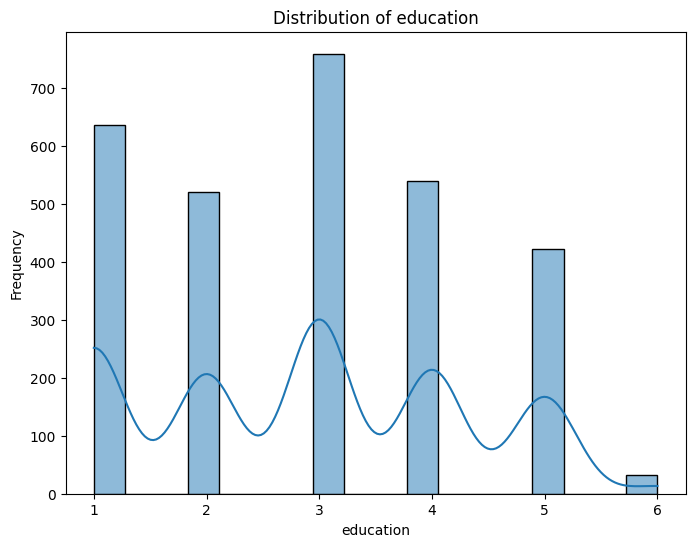

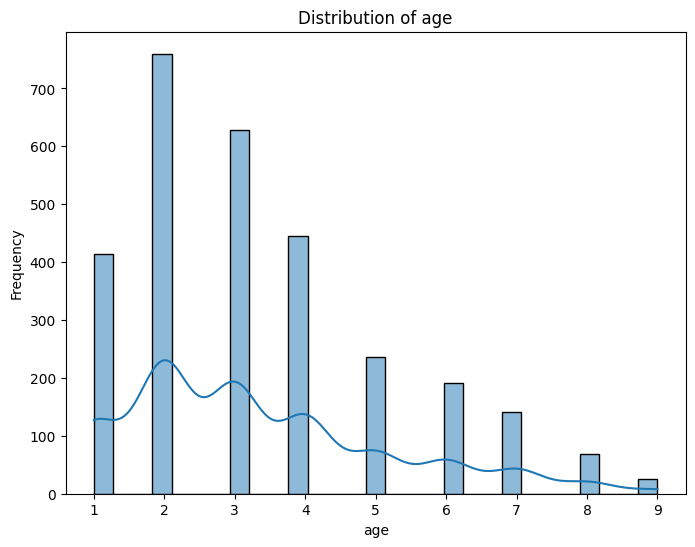

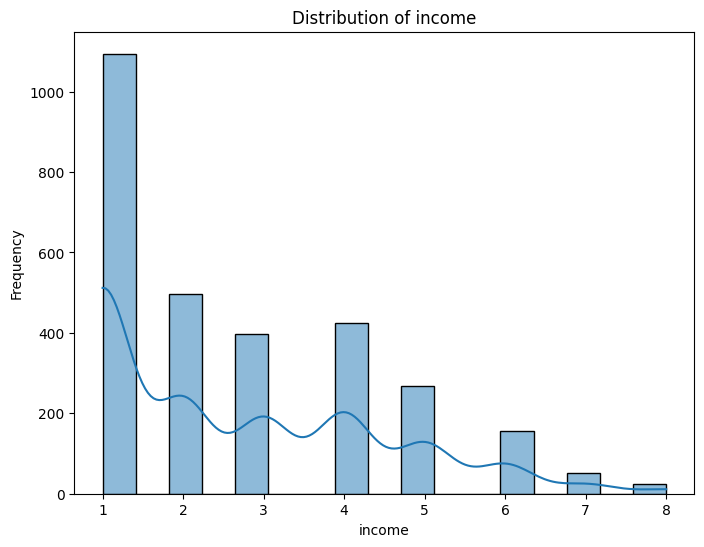

In [ ]:
# Histograms and Density Plots for numerical features
numerical_features = ['education', 'age', 'income']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=eda_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# (Seaborn.Histplot, 2024)
# this code was adapted from code generated by Chat GPT

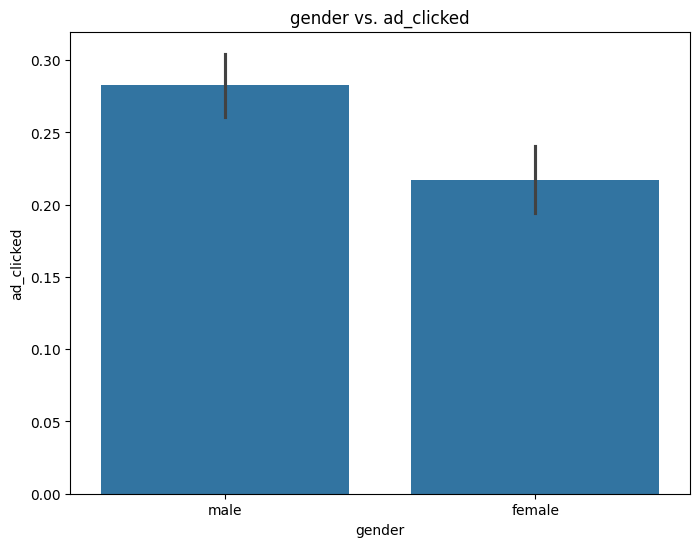

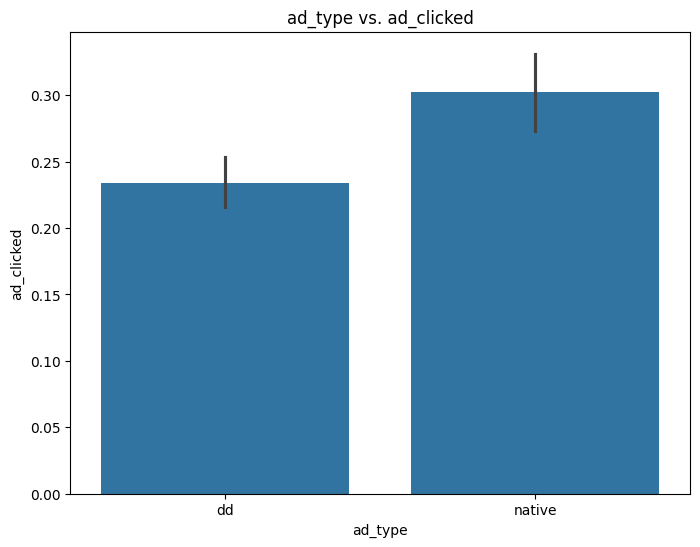

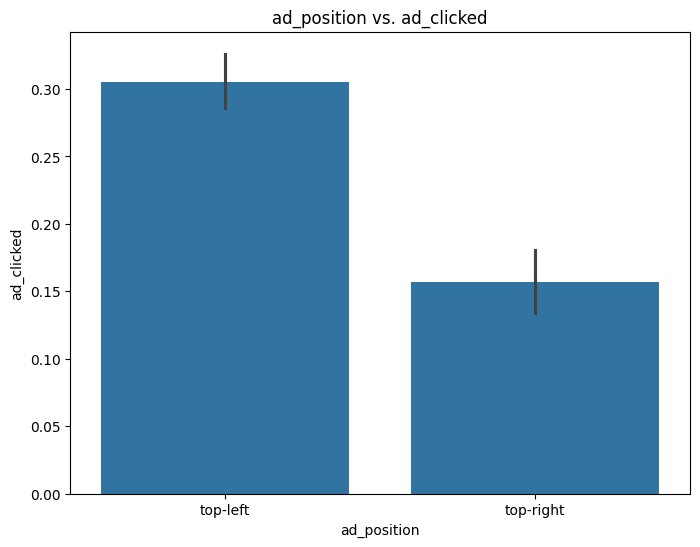

In [ ]:
# Box Plots for categorical or binary encoded features
categorical_features = ['gender', 'ad_type', 'ad_position']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=eda_df, x=feature, y='ad_clicked')
    plt.title(f'{feature} vs. ad_clicked')
    plt.xlabel(feature)
    plt.ylabel('ad_clicked')
    plt.show()

# this code was adapted from code generated by Chat GPT

**Ad Type vs. Ad Clicked:**

The bar plot compares the average ad click rates between two ad types: 'dd' and 'native'. The 'native' ad type has a higher click rate compared to the 'dd' ad type. The error bars represent the 95% confidence interval for the mean click rates. This suggests that 'native' ads are more effective in generating clicks compared to 'dd' ads.

**Ad Position vs. Ad Clicked:**

The bar plot compares the average ad click rates between two ad positions: 'top-left' and 'top-right'. Ads positioned at 'top-left' have a higher click rate compared to those at 'top-right'. The error bars represent the 95% confidence interval for the mean click rates. This indicates that ads placed in the 'top-left' position are more likely to be clicked by users compared to those in the 'top-right' position.

**Conclusion**

The visualizations provide valuable insights into the distributions and relationships of different variables in the dataset. The analysis of ad type and position shows that 'native' ads and 'top-left' positioned ads are more effective in generating clicks. These insights can guide further feature engineering and model development to improve the prediction of ad clicks.

("the preceding discussion is adapted from output generated by ChatGPT")


Next we look at the numeric values in the eda_df.

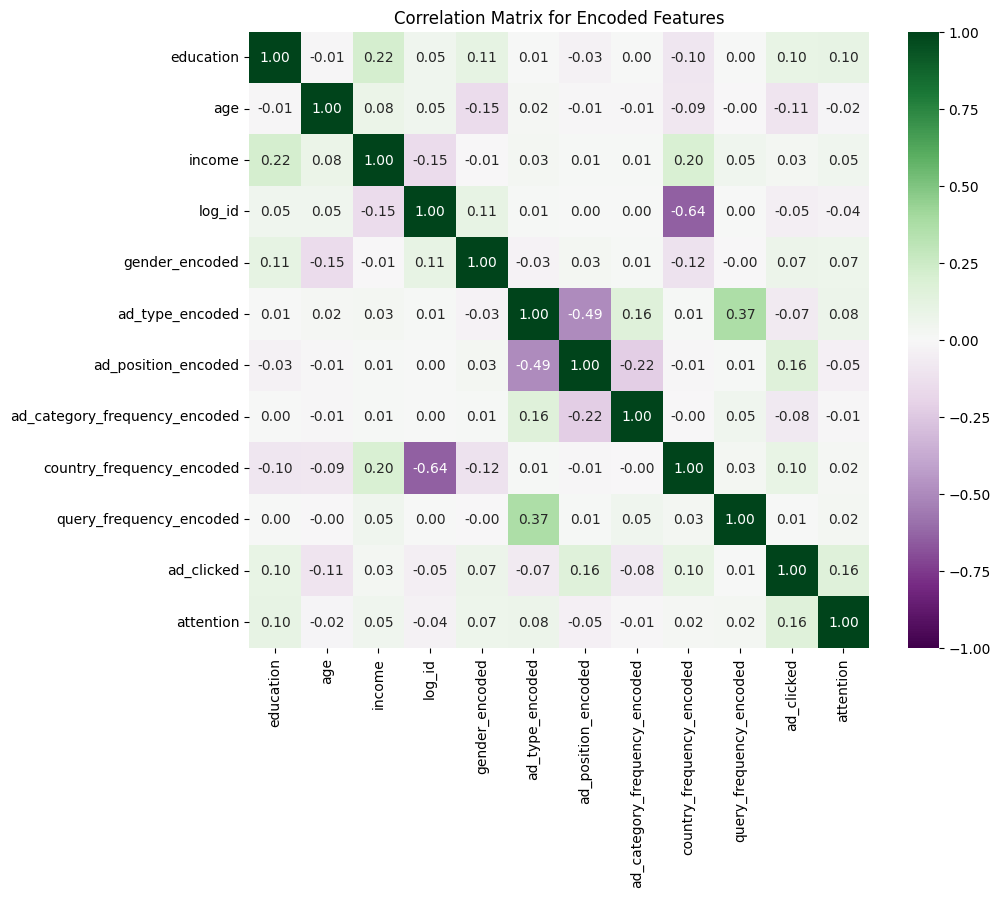

In [ ]:
# Get the numeric columns
eda_numeric_columns = eda_df.select_dtypes(include='number').columns

# Select the numeric columns from the DataFrame
eda_numeric_data = eda_df[eda_numeric_columns]

# Since all columns are now numeric, directly calculate the correlation matrix
correlation_matrix = eda_numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', vmin=-1, fmt=".2f")
plt.title('Correlation Matrix for Encoded Features')
plt.show()

# this code was adapted from code generated by Chat GPT

**Correlation with Ad Clicked:** The strongest positive correlation with ad_clicked is with ad_position_encoded (0.17), indicating that ad position might have an impact on ad clicks.

**Negative Correlations:** There are some negative correlations, such as ad_type_encoded and ad_position_encoded (-0.49), indicating that these features are inversely related.

**Low Correlations:** Most features have low to moderate correlations with ad_clicked and each other, suggesting a diverse set of independent features.

("the preceding discussion is adapted from output generated by ChatGPT")

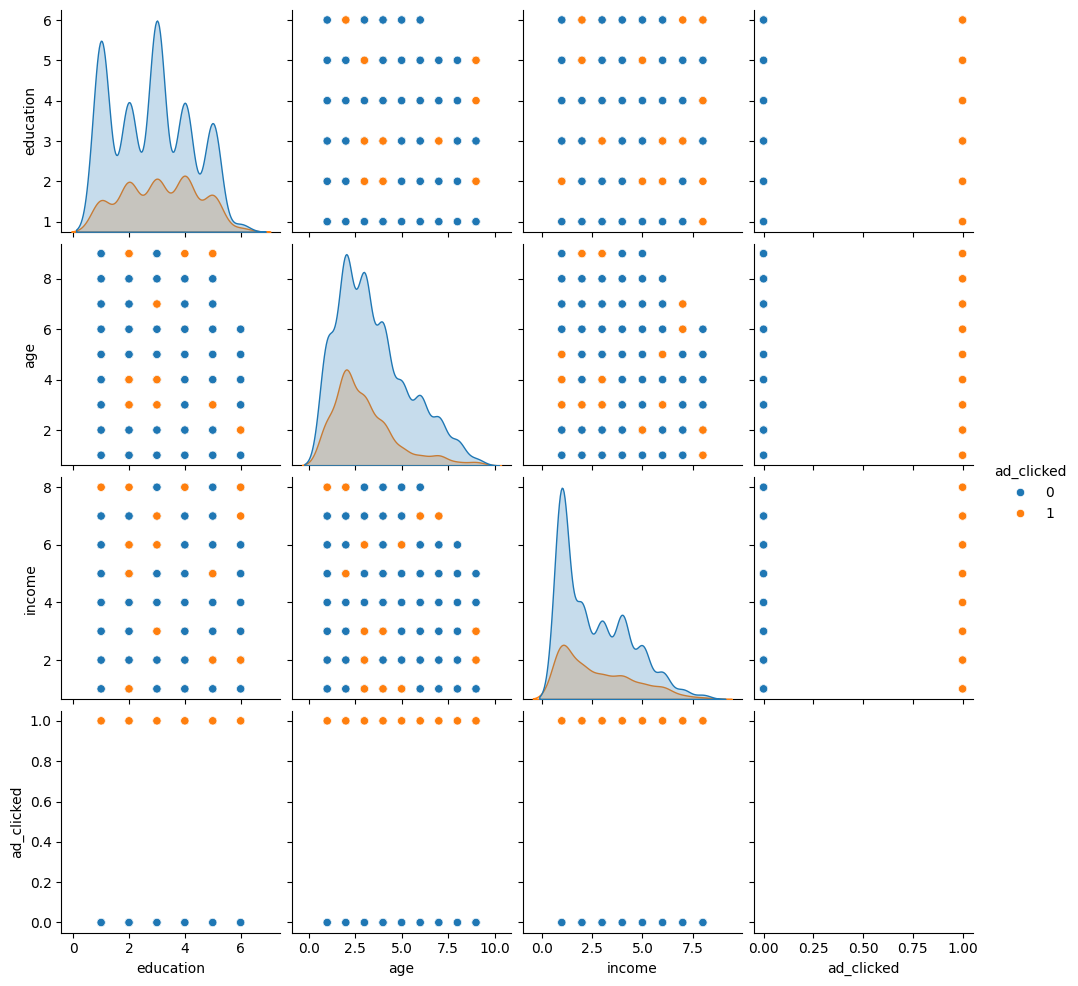

In [ ]:
# Pairplot for numerical features
sns.pairplot(eda_df, vars=numerical_features + ['ad_clicked'], hue='ad_clicked')
plt.show()

# (Seaborn.Pairplot, 2024)
# this code was adapted from code generated by Chat GPT

The visualisation is a pairplot of numerical features and their relationship with ad_clicked:

**Visual Distribution:** Each variable's distribution is shown on the diagonal, highlighting the KDE and histogram.

**Relationships:** The scatter plots show the relationships between pairs of variables, colored by ad_clicked.

**Separation:** There is some separation between the classes, indicating that the features may have predictive power for ad_clicked.

Next I decided to look at some normalised value counts on suggestion of Zsofia Gyarmathy during our personal consultation.
Normalising value counts can allow for a fair comparison of distribution of different features, especially when the features have different scales or magnitudes. Moreover, normlalised value counts can be easier to visualise and in datasets with imbalanced classes or categories as in this dataset, these values can provide insights into the imbalance and identify the dominant categories.

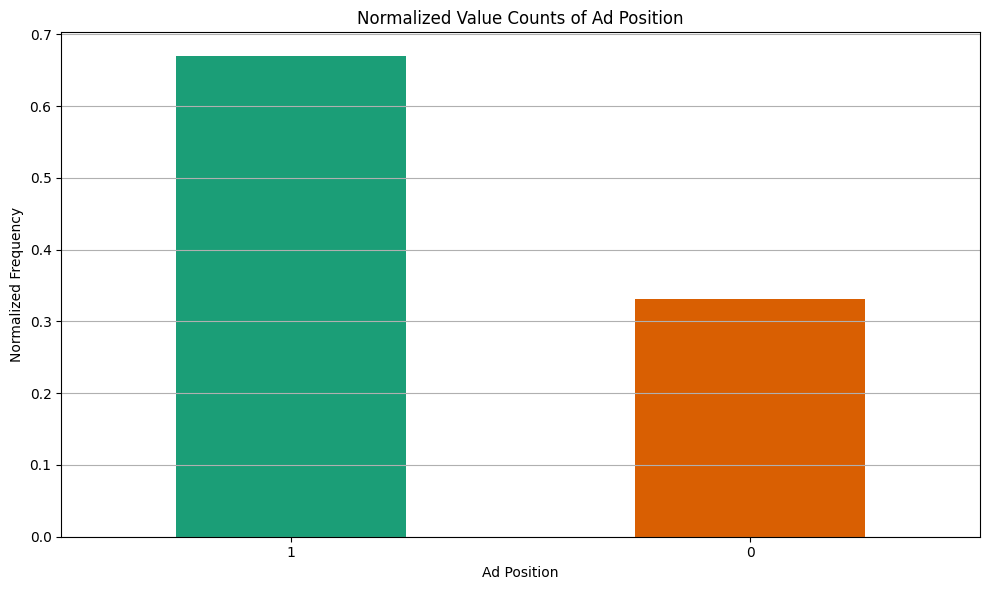

In [ ]:
# Calculate normalized value counts for the 'ad_position_encoded' column
normalized_ad_position_counts = eda_df['ad_position_encoded'].value_counts(normalize=True)

# Plot the normalized value counts
plt.figure(figsize=(10, 6))
normalized_ad_position_counts.plot(kind='bar', color=plt.cm.Dark2.colors)
plt.title('Normalized Value Counts of Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Normalized Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (pandas.Series.value_count, 2024)
# this code was adapted from code generated by Chat GPT

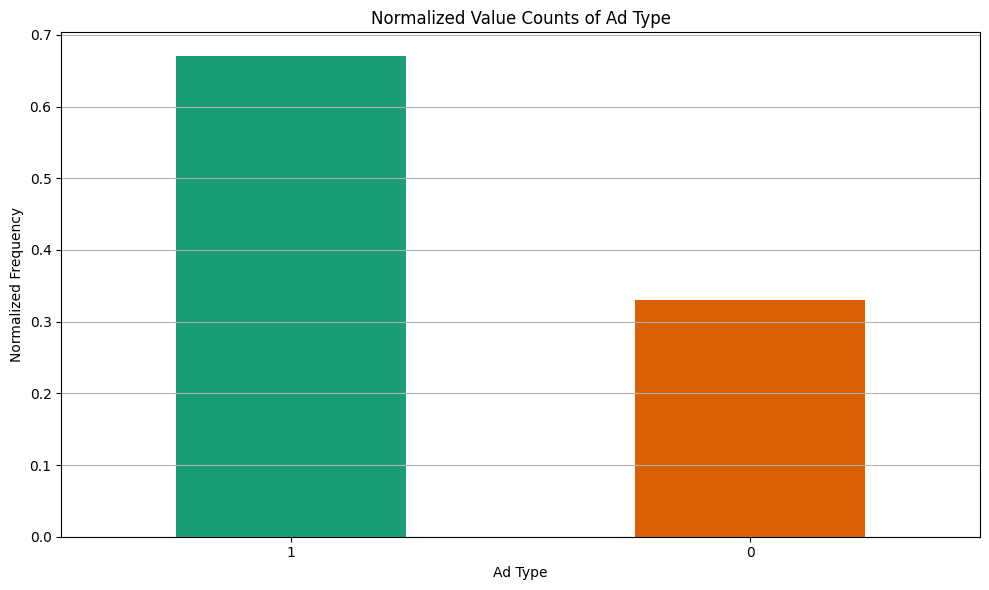

In [ ]:
# Calculate normalized value counts for the 'ad_type' column
normalized_ad_type_counts = eda_df['ad_type_encoded'].value_counts(normalize=True)

# Plot the normalized value counts
plt.figure(figsize=(10, 6))
normalized_ad_type_counts.plot(kind='bar', color=plt.cm.Dark2.colors)
plt.title('Normalized Value Counts of Ad Type')
plt.xlabel('Ad Type')
plt.ylabel('Normalized Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# this code was adapted from code generated by Chat GPT

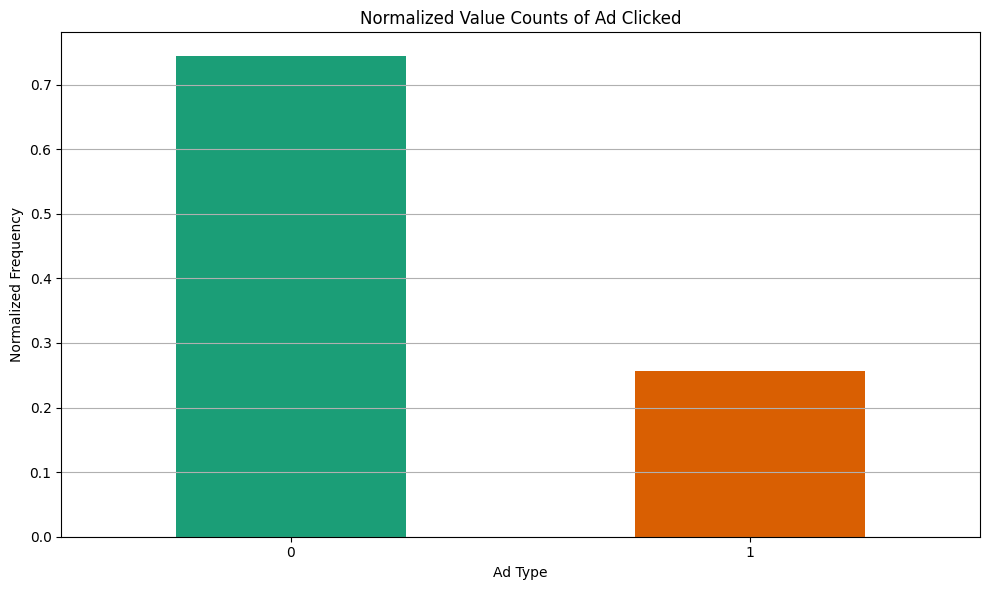

In [ ]:
# Calculate normalized value counts for the 'ad_clicked' column
normalized_ad_clicked_counts = eda_df['ad_clicked'].value_counts(normalize=True)

# Plot the normalized value counts
plt.figure(figsize=(10, 6))
normalized_ad_clicked_counts.plot(kind='bar', color=plt.cm.Dark2.colors)
plt.title('Normalized Value Counts of Ad Clicked')
plt.xlabel('Ad Type')
plt.ylabel('Normalized Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# this code was adapted from code generated by Chat GPT

In [ ]:
# @title model_df
# Print column names
print(eda_df.columns)

Index(['user_id', 'country', 'education', 'age', 'income', 'gender',
       'ad_position', 'ad_type', 'ad_category', 'serp_id', 'query', 'log_id',
       'gender_encoded', 'ad_type_encoded', 'ad_position_encoded',
       'ad_category_frequency_encoded', 'country_frequency_encoded',
       'query_frequency_encoded', 'ad_clicked', 'attention'],
      dtype='object')


In preparation of model building I define the restricted variables and create the model_df, that will be used for the model building.

In [ ]:
# DataFrame for Model Building (excludes restricted variables)
restricted_vars = ['user_id', 'education', 'age', 'income', 'gender', 'gender_encoded', 'attention']
model_df = eda_df.drop(columns=restricted_vars)

Next I filter model_df using the previously defined log_ids_5_seconds, to ensure that I comply with the criteria of the task to only use user data for people who have spent at leats 5 seconds on the website.

In [ ]:
# Filter model_df based on the list of log_ids
filtered_model_df = model_df[model_df['log_id'].isin(log_ids_5_seconds)]

# Print the filtered DataFrame
print("Filtered model_df based on users who spent at least 5 seconds on the site:")
print(filtered_model_df)


Filtered model_df based on users who spent at least 5 seconds on the site:
     country ad_position ad_type              ad_category        serp_id  \
0        PHL    top-left      dd  Computers & Electronics        tablets   
1        VEN   top-right      dd               Shop - All  casio-watches   
2        VEN    top-left  native               Shop - All   chivas-regal   
3        VEN   top-right      dd               Shop - All   chivas-regal   
4        VEN    top-left  native         Autos & Vehicles   audi-r8-used   
...      ...         ...     ...                      ...            ...   
2903     USA   top-right      dd               Shop - All     nike-shoes   
2904     USA    top-left      dd  Computers & Electronics        macbook   
2905     USA    top-left  native               Shop - All   cubs-tickets   
2906     USA   top-right      dd               Shop - All      flowers_2   
2907     USA   top-right      dd  Computers & Electronics     laptop-bag   

            

In [ ]:
numeric_col_model = filtered_model_df.select_dtypes(include='number').columns
col_to_exclude_model = ['log_id']
model_df_numeric = filtered_model_df[numeric_col_model.difference(col_to_exclude_model)]
print(model_df_numeric)

# this code was adapted from code generated by Chat GPT

      ad_category_frequency_encoded  ad_clicked  ad_position_encoded  \
0                          0.276727           0                    1   
1                          0.572705           1                    0   
2                          0.572705           0                    1   
3                          0.572705           0                    0   
4                          0.021313           0                    1   
...                             ...         ...                  ...   
2903                       0.572705           1                    0   
2904                       0.276727           0                    1   
2905                       0.572705           0                    1   
2906                       0.572705           0                    0   
2907                       0.276727           0                    0   

      ad_type_encoded  country_frequency_encoded  query_frequency_encoded  
0                   1                   0.004813           

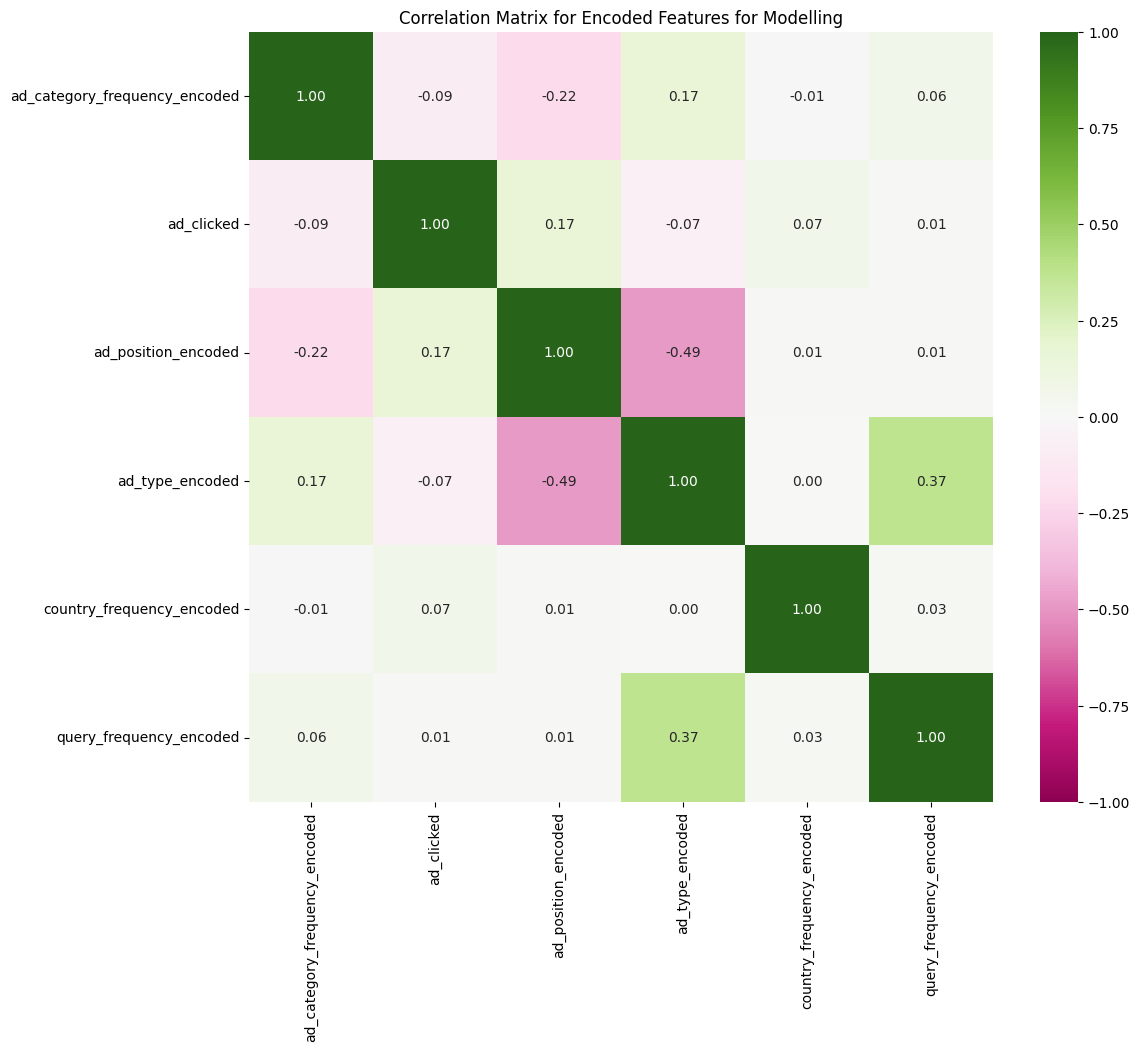

In [ ]:
# Since all columns are now numeric, directly calculate the correlation matrix
correlation_matrix = model_df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', vmin=-1, fmt=".2f")
plt.title('Correlation Matrix for Encoded Features for Modelling')
plt.show()

This is a correlation matrix for encoded features specifically for modeling purposes. Compared to the earlier heatmap, there are stronger correlations visible.

**Correlations:**

`ad_position_encoded` and `d_type_encoded` have a moderate negative correlation of -0.49. A moderate negative correlation suggests that certain ad types are not commonly associated with specific ad positions. This could imply distinct placement strategies for different ad types.

`ad_type_encoded` and `query_frequency_encoded` have a moderate positive correlation of 0.37. A moderate positive correlation indicates that certain ad types are more frequently associated with specific query types, possibly reflecting targeting strategies based on query types.

`ad_clicked` and `ad_position_encoded` have a moderate positive correlation of 0.17. A moderate positive correlation suggests that certain ad positions are slightly more likely to be associated with ad clicks. This could inform placement strategies to optimize ad clicks.

Although many features have weak correlations, they shouldn't be dismissed outright, especially in non-linear models where interactions between features can be significant.

("the preceding discussion is adapted from output generated by ChatGPT")

#Machine Learning Models

## Models Selection and Rationale

The models used include Logistic Regression, Random Forests, Support Vector Classifier (SVC), and Neural Networks. These are models I have used in previous course work and was already somewhat familiar with. Moreover, they are applicable for this data set.

### Logistic Regression:

**Description:** A linear model used for binary classification tasks. It estimates the probability that an instance belongs to a particular class using the logistic function.

**Rationale:** Logistic Regression is a simple yet effective model for binary classification problems. It provides a good baseline and allows for easy interpretation of feature importance. (Hackeling, 2017)

### Random Forest Classifier:

**Description:** An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks.

**Rationale:** Random Forests are robust to overfitting, handle high-dimensional data well, and can model complex relationships. They also provide feature importance scores, which are useful for understanding the impact of different features. (Hackeling, 2017), (https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles, 2024)

### Support Vector Classifier (SVC):

**Description:** A classification model that finds the hyperplane that best separates the data into classes. It is effective in high-dimensional spaces and uses kernel functions to handle non-linear relationships.

**Rationale:** SVCs are powerful for classification tasks, particularly when the decision boundary is not linear. They are robust to overfitting, especially in high-dimensional feature spaces. (https://scikit-learn.org/stable/modules/svm.html#svc, 2024)

### Neural Networks:

**Description:** Neural networks, inspired by the human brain, are a collection of algorithms aimed at pattern recognition. They are composed of interconnected layers of nodes, or neurons, capable of capturing intricate nonlinear relationships within data. (Bhadra, 2019)

**Rationale:** Neural Networks are chosen for their ability to model complex, non-linear relationships in the data. They are particularly useful for tasks involving large amounts of data and where feature interactions are complex. The use of Keras Tuner for hyperparameter optimization ensures that the best network architecture and parameters are selected. (Atienza, 2020)

## Conclusion

The selection of tools and models was driven by the need to handle a diverse dataset efficiently and to leverage different modeling techniques to capture the underlying patterns in the data. The combination of traditional machine learning models and deep learning approaches provides a comprehensive framework for tackling the problem of predicting ad clicks based on user behavior data.


##Train-test-validation Split

The process of training a machine learning model involves utilizing a training set to enable the algorithm to learn. The test set, separate from the training set, is used to evaluate the model's performance, ensuring it can generalize well to new data. Overfitting, wherein the model memorizes the training data instead of learning to generalize, is a concern to be addressed.

To fine-tune the learning process, a validation or hold-out set may be employed, helping to adjust hyperparameters that govern learning from the training data. While the model is assessed on the test set for real-world performance, the validation set should not influence this evaluation to avoid bias.

Partitioning supervised observations into training, validation, and test sets is a common practice. There are no strict guidelines for partition sizes, but a typical allocation is 50-75% for training, 10-25% for testing, and the rest for validation.

The size of training sets varies, from a few hundred to millions or even billions of observations in big data scenarios. While more data generally improves predictive power, the quality of the data is crucial. Algorithms trained on noisy or irrelevant data may perform poorly.

In scenarios where labeled data is scarce, cross-validation can be employed. This technique involves partitioning the training data into subsets, training the model on multiple partitions, and evaluating its performance iteratively. This approach provides a more reliable estimate of real-world performance compared to a single training/testing split. (Hackeling, 2017)

Following industry standars, I split my data as fllows: 60% training, 20% validation and 20% test. I set the random-state to 42, for reproducibility and stratify=y to ensure the class distribution in the target variable 'y' is preserved and thus the proportion of whether an ad was clicked or not remains consistent across the splits.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# Split Data
# Features
X = model_df_numeric.drop(['ad_clicked'], axis=1) # Features
y = filtered_model_df['ad_clicked']               # Target

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print("Shapes after preprocessing:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

print("Shapes after preprocessing:")
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

Shapes after preprocessing:
X_train shape: (1500, 5)
X_val shape: (500, 5)
X_test shape: (501, 5)
Shapes after preprocessing:
y_train shape: (1500,)
y_val shape: (500,)
y_test shape: (501,)


##Dimensionality reduction

Visualising the classes in the feature space can provide insights into the complexity of the relationship between features and the target variable. (p.c. Zsofia Gyarmathy) I decided to apply two different dimensionality reductions techniques like Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) to reduce the dimensionality of the feature space while preserving the structure of the data. Thus applying a linear and non-linear technique. (Awan, 2023) Then I create a scatter plot to have a visual representation of how the classes are distributed in the feature space.

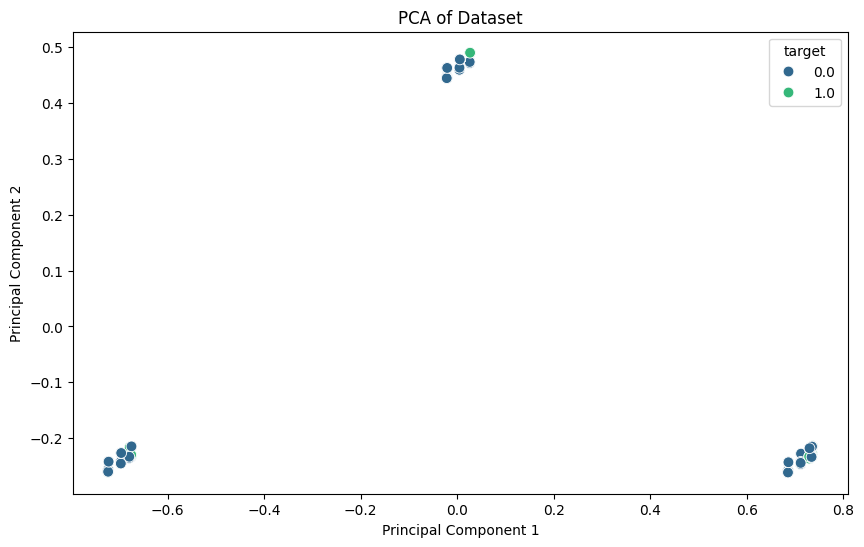

In [ ]:
# Dimensionality reduction and visualisation with PCA
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=pca_df, palette='viridis', s=60)
plt.title('PCA of Dataset')
plt.show()

# this code was adapted from code generated by Chat GPT

From the PCA (Principal Component Analysis) visualization of the dataset, we can observe distinct patterns that provide further insights into the dataset's structure and separability of classes.

**Observations**

**Cluster Separation:**
The PCA plot shows three distinct clusters of data points, which suggests that the dataset has clear groupings based on the first two principal components.
Within each cluster, there appears to be some overlap between the target classes (0 and 1).

**Class Distribution:**
Both target classes (0 and 1) are present in each cluster, but the separation within each cluster is more distinct compared to the t-SNE visualization.
The class 1 points (in green) are fewer compared to class 0 points (in blue), which might indicate class imbalance.

**Implications for Model Training and Hyperparameter Tuning**

**Logistic Regression:**

- Regularization (C): Given the clear separation in the PCA plot, logistic regression might perform well with moderate regularization. The range of C values (0.1 to 100) in your param_grid_lr should be effective.

- Penalty (penalty): Both l1 and l2 penalties can be explored, as either might work well given the clear separation in clusters.

**RandomForestClassifier:**

- Tree Depth (max_depth): Since the clusters are distinct, even shallow trees might capture the separability well. However, deeper trees (up to 30) should still be explored to ensure all nuances are captured.

- Number of Trees (n_estimators): A range of 100 to 300 trees should be sufficient to achieve a robust model, considering the clear cluster separations.

- Minimum Samples (min_samples_split and min_samples_leaf): Lower values (e.g., 1 or 2) might be effective given the clear clusters but should be balanced to prevent overfitting.

**SVC:**

- Regularization (C): SVC should perform well with a range of C values due to the clear separability observed in PCA.

- Kernel Coefficient (gamma): Given the distinct clusters, exploring a range of gamma values will help ensure the best decision boundaries are identified.

- Max Iterations: SVC can benefit from higher iterations to ensure convergence, especially if there are more complex underlying patterns.

**Handling Class Imbalance**

- Balancing Techniques: Consider techniques to handle any class imbalance observed, such as oversampling the minority class, undersampling the majority class, or using class weights in your models.
Here I chose to apply Synthetic Minority Oversampling Technique (SMOTE) to address the class imbalance previously observed in the data. (Haibo et al., 2013)

- Evaluation Metrics: Focus on evaluation metrics that are robust to class imbalance, such as precision, recall, F1 score, and ROC-AUC, rather than accuracy alone.

**Additional Steps**
- Feature Engineering: The distinct clusters suggest that the features are already informative. However, further feature engineering could enhance model performance.

- Cross-Validation: Ensure robust cross-validation to validate the model performance and prevent overfitting.

**Conclusion**
The PCA visualization reveals distinct clusters with some overlap between the classes. This indicates that the decision boundary between the classes could be complex and and a more complex model might be needed. This should guide the hyperparameter tuning to explore moderate regularization and depths, while also considering the handling of class imbalance. These insights should help in achieving optimal model performance.

("the preceding discussion is adapted from output generated by ChatGPT")

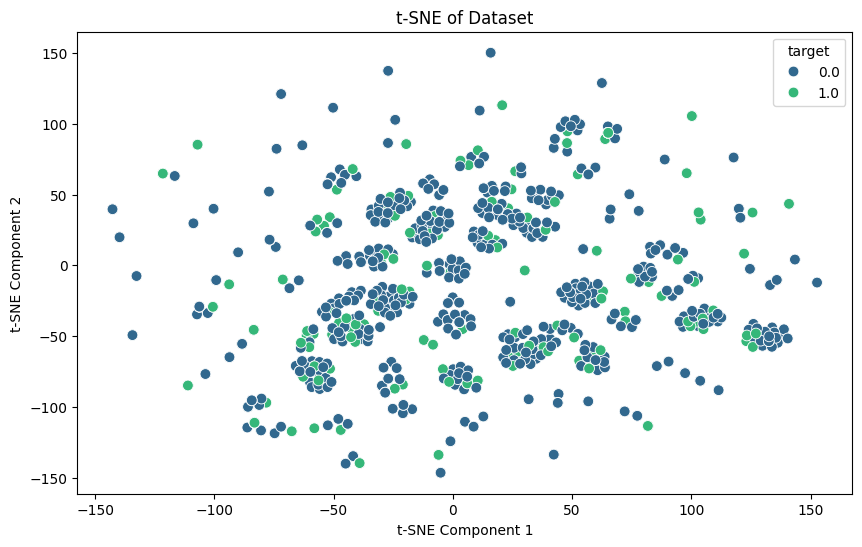

In [ ]:
# Dimensionality reduction and visualisation with t-SNE
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['target'] = y

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='target', data=tsne_df, palette='viridis', s=60)
plt.title('t-SNE of Dataset')
plt.show()

# this code was adapted from code generated by Chat GPT

From the t-SNE visualization, we can observe several patterns that can guide us in understanding the structure of the data and how to optimize the hyperparameters for our models. H

**Observations**

**Cluster Formation:**
The data points form several clusters, indicating that there might be natural groupings in the feature space.
Both target classes (0 and 1) appear in multiple clusters, suggesting some degree of overlap and complexity in the feature space.

**Class Overlap:**
There is significant overlap between the two classes (0 and 1) in many clusters. This indicates that the decision boundary between the classes might be complex and not easily separable by simple linear methods.

**Outliers:**
A few data points are scattered far from the main clusters. These might be outliers or noise in the data, which could affect model performance if not handled appropriately.

**Implications for Model Training and Hyperparameter Tuning**

**Logistic Regression:**

- Regularization: Since there is overlap between classes, regularization will be important to avoid overfitting. The range of C values (0.1 to 100) in your param_grid_lr is appropriate. Both l1 and l2 penalties should be explored to see which works better in reducing overfitting.
- Max Iterations: Increasing max_iter ensures convergence, especially if the data is not linearly separable.

**RandomForestClassifier:**

- Tree Depth (max_depth): Given the complexity and overlap, deeper trees might be necessary to capture the structure. However, very deep trees can overfit, so a range up to 30 is reasonable.
- Number of Trees (n_estimators): More trees generally improve performance by reducing variance. The range of 100 to 300 is appropriate.
- Minimum Samples (min_samples_split and min_samples_leaf): Lower values (e.g., 2, 5) can help capture the detailed structure within clusters but might increase overfitting.

**SVC:**

- Regularization (C): As with logistic regression, exploring a range of regularization strengths will help manage the overlap between classes.
- Kernel Coefficient (gamma): Since the decision boundary might be complex, exploring different gamma values will help capture the non-linearity. Including 'scale' and 'auto' is good, along with specific values.
- Max Iterations: SVC can be computationally intensive, so ensuring a high number of iterations (up to 300,000) is prudent for convergence.

**Additional Steps**

- Handle Outliers:
Consider preprocessing steps to handle outliers, such as removing or transforming them, to improve model performance.
- Feature Engineering:
Explore feature engineering techniques to create new features that might help in better class separation.
- Model Validation:
Use cross-validation to ensure that the models generalize well to unseen data.

**Conclusion**
The t-SNE visualization indicates that the data has a complex structure with overlapping classes and several clusters. The chosen hyperparameter grids are appropriate, but careful tuning and validation will be essential to achieve the best model performance. Handling outliers and exploring
feature engineering can further improve the results.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# @ handling class imbalance
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# this code was adapted from code generated by Chat GPT

##Machine Learning Models

**Scaling and Normalisation**

Scaling and normalization are essential preprocessing steps for many machine learning models. However, their necessity and impact vary based on the algorithm used.

- **Logistic Regression**:
  - **Scaling Motivation**: Logistic Regression is sensitive to the scale of input features. Different scales can affect coefficients, leading to suboptimal performance.
  - **Scaler**: StandardScaler is suitable for centering the data around zero and scaling it to unit variance, aiding in faster convergence and better performance.

- **RandomForestClassifier**:
  - **Scaling**: Random Forests are insensitive to feature scale due to their tree-based nature. Feature splits are based on values, making scaling unnecessary.
  - **Scaler**: No scaling needed; StandardScaler can be omitted from the pipeline. (p.c. Zsofia Gyarmathy)

- **Support Vector Classifier (SVC)**:
  - **Scaling**: SVMs, especially with RBF or polynomial kernels, are sensitive to feature scale as distances between data points affect the decision boundary.
  - **Scaler**: MinMaxScaler is appropriate for scaling data to a fixed range [0, 1], aiding in faster convergence and better performance. (Jaiswal, 2024)

**Adjustments for Neural Network**: If utilizing a neural network, scaling data is crucial. Neural networks benefit significantly from data normalization, aiding in quicker and more stable convergence during gradient descent optimization.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# Machine Learning Models
# Define the pipelines for each classifier
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()), #Logistic Regression is sensitive to the scale of input features. Since it uses a linear model, different scales can disproportionately affect the coefficients, leading to suboptimal performance.
    ('classifier', LogisticRegression(random_state=42, solver='saga', max_iter=15000))  # Increase max_iter
])

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_svc = Pipeline([
    ('scaler', MinMaxScaler()),   # is appropriate as it scales the data to a fixed range [0, 1], which helps in faster convergence and better performance.
    ('classifier', SVC(random_state=42, probability=True, max_iter=300000)) # Set probability=True --> Increase max_iter
])


def train_evaluate_model(pipeline, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):   # X_val and y_val are added as parameters to the function, ensuring the validation set is passed correctly.
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Obtain the best estimator from the grid search
    best_model = grid_search.best_estimator_

    # Use the best estimator to make predictions on the validation set
    val_predictions = best_model.predict(X_val)

    # Evaluate the performance of the model using validation predictions
    val_accuracy = accuracy_score(y_val, val_predictions)

    # Use the best model to make predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    print(f'Best model: {best_model.named_steps["classifier"].__class__.__name__}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

    # Print validation accuracy
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    # Print test accuracy
    test_accuracy = best_model.score(X_test, y_test)
    print(f'Test Accuracy: {best_model.score(X_test, y_test):.4f}')

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Print ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC Score: {roc_auc:.4f}')


# Define the parameter grid for LogisticRegression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10, 100], # Since there is overlap between classes, regularization is important to avoid overfitting.
    'classifier__max_iter': [100, 200, 300, 1000, 2000, 5000, 8000, 15000],  # Increase max_iter parameter to ensure convergence
    'classifier__penalty': ['l1', 'l2'] # both penalties are explored to see which works better inr educing overfitting
}

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30], # given the complexity and overlap, deeper trees might be necessary to capture structure, but very deep ones can overfit
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10] # lower values can help capture the detiled structure within clusters, but might increase overfitting
}

# Define the parameter grid for SVC
param_grid_svc = {
    'classifier__C': [0.1, 1, 10, 100], # similarly to lr, regularization is important to avoid overfitting.
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001], # Since the decision boundary might be complex, exploring different gamma values will help capture the non-linearity.
    'classifier__max_iter': [30000, 50000, 100000, 200000, 300000]  # SVC can be computationally intensive, so ensuring a high number of iterations (up to 300,000) is prudent for convergence.
}

# Create separate GridSearchCV objects for each classifier
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy')

# Fit each grid search object to the data
grid_search_lr.fit(X_train_resampled, y_train_resampled)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
grid_search_svc.fit(X_train_resampled, y_train_resampled)


# Print the best parameters and best scores for each classifier
print("LogisticRegression Best parameters:", grid_search_lr.best_params_)
print("LogisticRegression Best cross-validation accuracy:", grid_search_lr.best_score_)

print("RandomForestClassifier Best parameters:", grid_search_rf.best_params_)
print("RandomForestClassifier Best cross-validation accuracy:", grid_search_rf.best_score_)

print("SVC Best parameters:", grid_search_svc.best_params_)
print("SVC Best cross-validation accuracy:", grid_search_svc.best_score_)

# this code was adapted from code generated by Chat GPT

LogisticRegression Best parameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1'}
LogisticRegression Best cross-validation accuracy: 0.5956521739130435
RandomForestClassifier Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
RandomForestClassifier Best cross-validation accuracy: 0.7169565217391304
SVC Best parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__max_iter': 30000}
SVC Best cross-validation accuracy: 0.6165217391304347


In [ ]:
# Fit and evaluate models
# Here I changed to a vectorised approach in the application following feedback received from my teacher
train_evaluate_model(pipeline_lr, param_grid_lr, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)
train_evaluate_model(pipeline_rf, param_grid_rf, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)
train_evaluate_model(pipeline_svc, param_grid_svc, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

# this code was adapted from code generated by Chat GPT

Best model: LogisticRegression
Best parameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1'}
Best cross-validation accuracy: 0.5957
Validation Accuracy: 0.5400
Test Accuracy: 0.5489
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63       384
           1       0.30      0.72      0.43       117

    accuracy                           0.55       501
   macro avg       0.58      0.61      0.53       501
weighted avg       0.72      0.55      0.58       501

Precision: 0.3032
Recall: 0.7179
F1 Score: 0.4264
ROC-AUC Score: 0.6523
Best model: RandomForestClassifier
Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 0.7170
Validation Accuracy: 0.6600
Test Accuracy: 0.6507
Classification Report:
              precision    recall  f1-score   support

         

The best performing model in terms of test accuracy and balanced performance metrics is the **Random Forest Classifier:**
- Best cross-validation accuracy: 0.7170
- Test accuracy: 0.6507
- ROC-AUC Score: 0.5956
Despite the Logistic Regression and SVC showing relatively high recall for Class 1, their overall accuracy and precision metrics are lower compared to the Random Forest Classifier. The Random Forest Classifier offers a more balanced performance across both classes.

##Neural Network Model

In [ ]:
# This function builds a neural network model using hyperparameters defined by the HyperParameters object (hp).
def build_model(hp):
    # Create a Sequential model
    model = Sequential()
    # Add a dense layer with variable units, using the 'relu' activation function
    # The number of units is chosen from a discrete uniform distribution defined by the hp.Int method
    # The range of units is between 32 --> 64 and 512, with a step size of 32 --> 64
    # The input shape is determined by the shape of the transformed training data
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('activation', ['relu', 'tanh']),
                    input_shape=(X_train_resampled.shape[1],)))  # Use the transformed shape
    # Add a dropout layer with a variable dropout rate
    # The dropout rate is chosen from a uniform distribution between 0 and 0.5 with a step size of 0.1
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    # Add the output layer with one unit and sigmoid activation function for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate and optimizer type
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)


    # Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# this code was adapted from code generated by Chat GPT

In [ ]:
# Convert Pandas DataFrames to NumPy arrays for the neural network
X_train_resampled = X_train_resampled.values if isinstance(X_train_resampled, pd.DataFrame) else X_train_resampled
X_val = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# this code was adapted from code generated by Chat GPT

In [ ]:
# Initialize and run the tuner
hp = HyperParameters()

# Create and compile the tuner
tuner = RandomSearch(
    build_model,
    objective='accuracy',      # Optimize for accuracy
    max_trials=200,            # Increase the number of trials 15 --> 30 --> 50 --> 100 --> 150 --> 200
    executions_per_trial=3,   # Number of times to evaluate each model 1 --> 2 --> 3 # Increase executions per trial for more robustness
    directory='model_tuning',
    project_name='keras_tuner'
)

# Define callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Fit the tuner
history = tuner.search(X_train_resampled, y_train_resampled,
             validation_data=(X_val, y_val),
             epochs=20,
             batch_size=hp.Int('batch_size', min_value=16, max_value=128, step=16),  # Tune batch size
             callbacks=[early_stopping_callback],
             verbose=2) # This should print the progress of each epoch

# Print tuner results summary
tuner.results_summary()

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)


# Call the build_model function with the hyperparameters
model = build_model(hp)

# Print model summary
best_model.summary()

# Train the best model on the entire resampled training dataset with early stopping
history = best_model.fit(X_train_resampled, y_train_resampled,
                         validation_data=(X_val, y_val),
                         epochs=100,  # Start with a large number and rely on early stopping
                         callbacks=[early_stopping_callback],
                         verbose=2)

# this code was adapted from code generated by Chat GPT

Trial 200 Complete [00h 00m 17s]
accuracy: 0.5004347860813141

Best accuracy So Far: 0.6088405847549438
Total elapsed time: 00h 47m 03s
Results summary
Results in model_tuning/keras_tuner
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 156 summary
Hyperparameters:
units: 128
activation: relu
dropout: 0.0
optimizer: rmsprop
learning_rate: 0.00999848147929744
Score: 0.6088405847549438

Trial 140 summary
Hyperparameters:
units: 512
activation: relu
dropout: 0.0
optimizer: adam
learning_rate: 0.0052100088789352106
Score: 0.6073912978172302

Trial 179 summary
Hyperparameters:
units: 480
activation: relu
dropout: 0.0
optimizer: rmsprop
learning_rate: 0.00725917251583102
Score: 0.606521725654602

Trial 072 summary
Hyperparameters:
units: 448
activation: relu
dropout: 0.0
optimizer: rmsprop
learning_rate: 0.008962452499275811
Score: 0.6047826011975607

Trial 150 summary
Hyperparameters:
units: 512
activation: relu
dropout: 0.30000000000000004
optimizer: rmsprop
learni

The hyperparameter tuning process was conducted using Keras Tuner with a total of 200 trials.

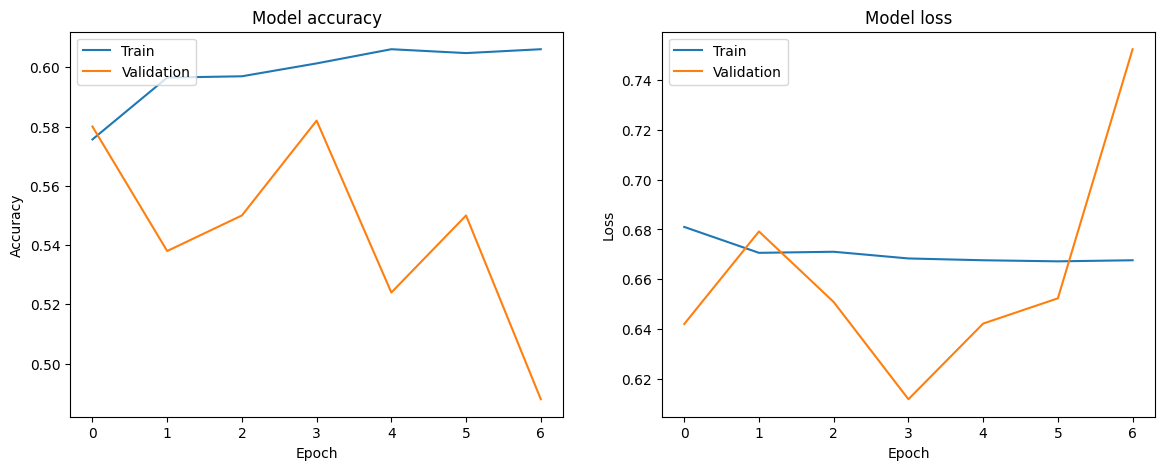

In [ ]:
# Inspect the training history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# this code was adapted from code generated by Chat GPT

**Neural Network Model Performance Analysis**

**Model Accuracy Plot**

**Training Accuracy:**
- Increases steadily over epochs, reaching above 0.60.

**Validation Accuracy:**
- Starts at around 0.58, drops to 0.54, then fluctuates and peaks around 0.58 before a drastic drop in the final epoch.

**Model Loss Plot**

**Training Loss:**
- Decreases from about 0.68 to 0.66.

**Validation Loss:**
- Fluctuates, starting at 0.68, dropping to 0.61, then spiking to over 0.75 in the final epoch.

**Conclusion and Recommendations**

**Overfitting:**
- Signs of overfitting observed due to fluctuations in validation accuracy and a spike in validation loss.

**Early Stopping:**
- Early stopping applied correctly after a spike in validation loss.

**Possible Improvements:**
- **Regularization:** Use L2 regularization or dropout layers.
- **Hyperparameter Tuning:** Experiment with dropout rates and learning rates.
- **Data Augmentation:** Apply techniques for more diverse training samples.
- **Cross-Validation:** Use k-fold cross-validation for better evaluation.

**Next Steps**

- **Regularization:** Increase regularization.
- **Hyperparameter Search:** Extend the range and explore different parameters.
- **Model Complexity:** Simplify the model to capture essential patterns.
- **Ensemble Methods:** Consider bagging or boosting for improved performance.

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# Use the best model to make predictions on the test set
predictions = best_model.predict(X_test)

# Determine the optimal threshold based on validation set
positive_class_proba = predictions[:, 0]
optimal_threshold = 0
best_precision = 0

# Iterate over different threshold values
for threshold in np.arange(0.1, 1.0, 0.05):
    # Threshold predictions to obtain binary labels
    binary_predictions = (positive_class_proba > threshold).astype(int)

    # Calculate precision
    precision = precision_score(y_test, binary_predictions, zero_division=1)

    # Update optimal threshold if precision improves
    if precision > best_precision:
        best_precision = precision
        optimal_threshold = threshold

print("Optimal Threshold:", optimal_threshold)
print("Best Precision:", best_precision)

# Apply the optimal threshold to make final predictions
final_predictions = (positive_class_proba > optimal_threshold).astype(int)

# Compute and print classification metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
roc_auc = roc_auc_score(y_test, positive_class_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

# this code was adapted from code generated by Chat GPT

16/16 [==============================] - 0s 1ms/step
Optimal Threshold: 0.7500000000000002
Best Precision: 1.0
Accuracy: 0.7664670658682635
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC score: 0.6593104522792024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The provided output includes predictions from the best model on the test set, determination of the optimal threshold for classification, and various evaluation metrics.

**Evaluation Metrics**
- Accuracy: 0.7664670658682635
 - This indicates that approximately 76.65% of the test instances were correctly classified.
- Precision: 0.0
 - This suggests that the model did not correctly predict any positive instances when using the optimal threshold of 0.75.
- Recall: 0.0
 -This indicates that the model did not identify any of the actual positive instances.
- F1-score: 0.0
 - The F1-score, which is the harmonic mean of precision and recall, is also 0.0 due to both precision and recall being 0.
- ROC-AUC score: 0.6593104522792024
 - The ROC-AUC score measures the model's ability to discriminate between positive and negative classes. A score of approximately 0.66 suggests that the model has some discriminatory power but is not particularly strong.

**Warnings and Observations**
- **UndefinedMetricWarning:** The warning indicates that precision is ill-defined because there were no predicted positive samples. This typically occurs when the model is overly conservative, predicting almost all instances as negative.
- **Model Performance:** Despite having high precision at the optimal threshold, the model's recall is very poor, leading to an F1-score of 0. This indicates that the model fails to capture positive instances, making it unreliable for detecting ad clicks.

("the preceding discussion is adapted from output generated by ChatGPT")

#Interpretation and Visualization of the Modeling Results

Models are evaluated using various metrics to assess their performance and effectiveness in solving a particular task. Here's an explanation of the evaluation metrics used:

**Accuracy:** Accuracy is one of the simplest metrics and represents the ratio of correctly predicted instances to the total number of instances. It provides an overall assessment of the model's correctness. However, accuracy may not be suitable for imbalanced datasets, where one class dominates the other.

**Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model. It focuses on the correctness of positive predictions and is useful when the cost of false positives is high. A high precision indicates that the model is good at avoiding false positives.

**Recall (Sensitivity):** Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It focuses on the ability of the model to capture all positive instances and is useful when the cost of false negatives is high. A high recall indicates that the model is good at identifying positive instances.

**F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the dataset is imbalanced. A high F1 score indicates both high precision and high recall, suggesting a well-performing model.

**Area Under the ROC Curve (AUC-ROC):** The ROC curve plots the true positive rate (recall) against the false positive rate (1-specificity) for different threshold values. The AUC-ROC represents the area under the ROC curve and provides a single scalar value summarizing the model's ability to distinguish between the positive and negative classes. A higher AUC-ROC value indicates better discrimination performance of the model.

These metrics are essential for evaluating the performance of classification models and help in selecting the most suitable model for a specific task based on its objectives and requirements.

(https://geeksforgeeks.org/machine-learning-model-evaluation/, 2024)

("the preceding discussion is adapted from output generated by ChatGPT")

In [ ]:
# @title Machine Learning Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC-AUC score:", roc_auc)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, precision, recall, f1, roc_auc

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
evaluate_model(grid_search_rf.best_estimator_, X_test, y_test)

# Evaluate SVC
print("\nSVC Evaluation:")
evaluate_model(grid_search_svc.best_estimator_, X_test, y_test)

# Evaluate Best Neural Network Model
y_pred_nn = best_model.predict(X_test)
y_pred_proba_nn = best_model.predict(X_test)[:, 0]

print("Data type of y_test:", y_test.dtype)
print("Data type of y_pred_nn:", y_pred_nn.dtype)

# Round float predictions to the nearest integer (0 or 1)
y_pred_nn_rounded = np.round(y_pred_nn).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn_rounded)
precision_nn = precision_score(y_test, y_pred_nn_rounded)
recall_nn = recall_score(y_test, y_pred_nn_rounded)
f1_nn = f1_score(y_test, y_pred_nn_rounded)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print("\nNeural Network Evaluation:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:", f1_nn)
print("ROC-AUC score:", roc_auc_nn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_rounded))

# this code was adapted from code generated by Chat GPT

Logistic Regression Evaluation:
Accuracy: 0.5489021956087824
Precision: 0.30324909747292417
Recall: 0.717948717948718
F1-score: 0.42639593908629436
ROC-AUC score: 0.6523103632478633

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63       384
           1       0.30      0.72      0.43       117

    accuracy                           0.55       501
   macro avg       0.58      0.61      0.53       501
weighted avg       0.72      0.55      0.58       501


Random Forest Evaluation:
Accuracy: 0.6506986027944112
Precision: 0.2986111111111111
Recall: 0.36752136752136755
F1-score: 0.32950191570881227
ROC-AUC score: 0.5955751424501425

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       384
           1       0.30      0.37      0.33       117

    accuracy                           0.65       501
   macro avg       0.55      0.55      0.55    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featu

16/16 [==============================] - 0s 1ms/step
Data type of y_test: int64
Data type of y_pred_nn: float32

Neural Network Evaluation:
Accuracy: 0.49101796407185627
Precision: 0.2909090909090909
Recall: 0.8205128205128205
F1-score: 0.42953020134228187
ROC-AUC score: 0.6593104522792024

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.39      0.54       384
           1       0.29      0.82      0.43       117

    accuracy                           0.49       501
   macro avg       0.58      0.61      0.49       501
weighted avg       0.74      0.49      0.51       501



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


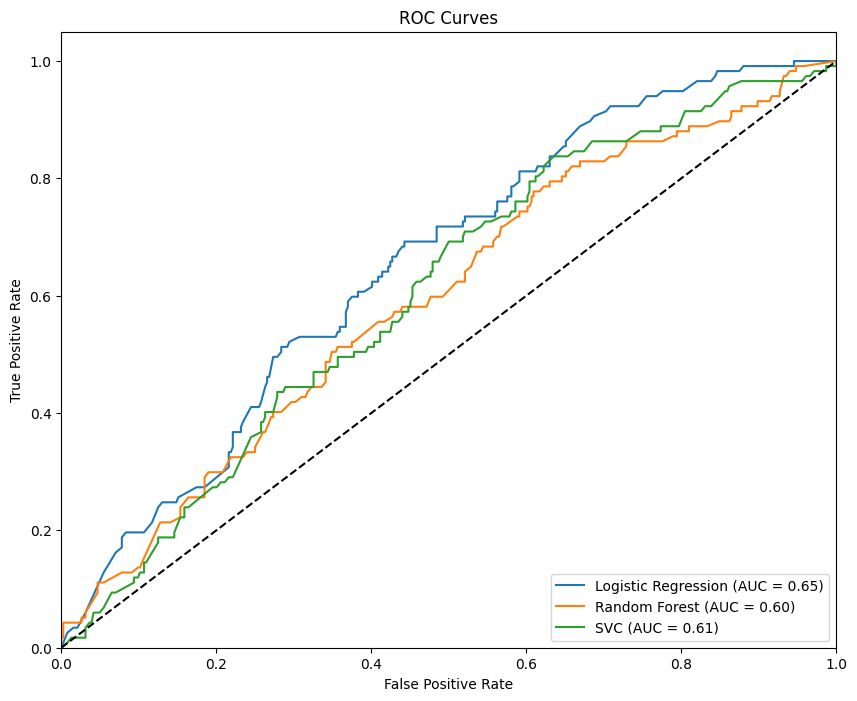

In [ ]:
# ROC Curves
def plot_roc_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

models = [grid_search_lr.best_estimator_, grid_search_rf.best_estimator_, grid_search_svc.best_estimator_]
model_names = ['Logistic Regression', 'Random Forest', 'SVC']
plot_roc_curves(models, model_names, X_test, y_test)

# this code was adapted from code generated by Chat GPT

The ROC (Receiver Operating Characteristic) curve plots the true positive rate (recall) against the false positive rate (1-specificity) for different threshold values. The AUC (Area Under the Curve) is a measure of how well a parameter can distinguish between two diagnostic groups (click or no click in this case).

Logistic Regression is the most effective model among the three, with the highest AUC, indicating it has the best ability to distinguish between users who clicked on an ad and those who did not based on the given features.
Random Forest and SVC show moderate performance but are still better than random guessing.
There is plenty of room for improvement here with further fine-tuning, feature engineering or the application of ensemble methods combining the stregths of different models.

("the preceding discussion is adapted from output generated by ChatGPT")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


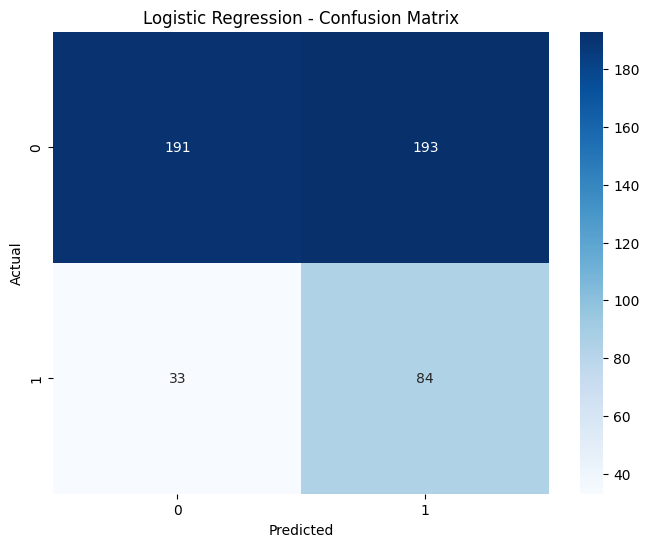

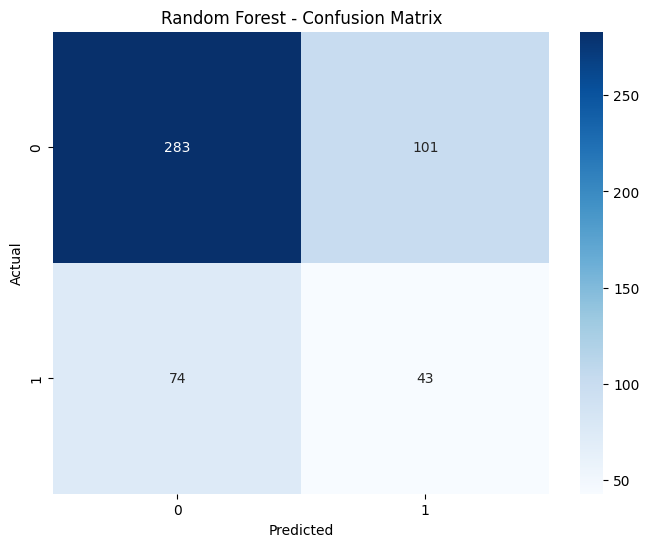

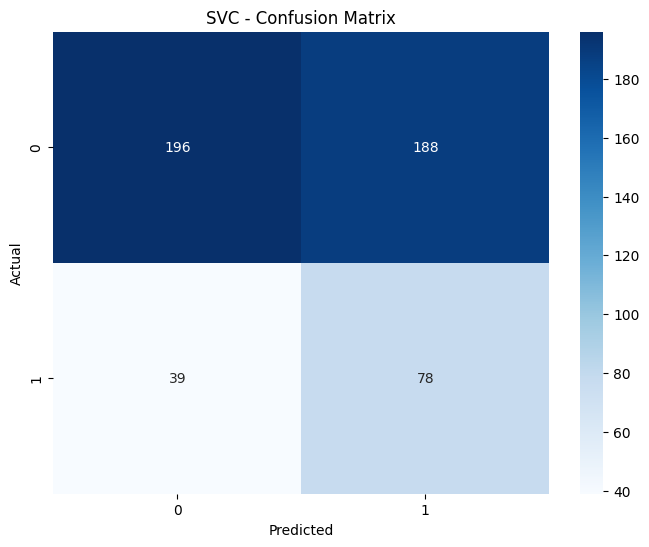

In [ ]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Predict with the best models
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)

plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_svc, 'SVC')

# this code was adapted from code generated by Chat GPT

The confusion matrices for the Logistic Regression, Random Forest, and SVC models give us insight into the performance of these models in terms of true positives, true negatives, false positives, and false negatives.

**Logistic Regression**
- True Positives (TP): 84
- True Negatives (TN): 191
- False Positives (FP): 193
- False Negatives (FN): 33
- The model has a high number of false positives, indicating that it often incorrectly predicts non-clicks as clicks.

**Random Forest**

- True Positives (TP): 43
- True Negatives (TN): 283
- False Positives (FP): 101
- False Negatives (FN): 74
- The random forest model has a lower number of false positives compared to the logistic regression model but a higher number of false negatives.

**SVC**

- True Positives (TP): 78
- True Negatives (TN): 196
- False Positives (FP): 188
- False Negatives (FN): 39
- The SVC model shows higher number of false positives and false negatives.

**Recommendations**
1. **Model Improvement:** Given the moderate performance of the models, further tuning and exploration of more complex models might help improve the accuracy and robustness. Techniques like ensemble methods, boosting, or deep learning approaches could be explored.
2. **Feature Engineering:** Additional feature engineering might help improve model performance. This can include interaction terms, polynomial features, or domain-specific features.
3. **Class Imbalance:** Addressing the class imbalance more effectively, can help improve the model’s performance on minority classes.
4. **Evaluation Metrics:** Depending on the business needs, evaluation metrics other than accuracy, such as precision-recall curves, F1-score, or other metrics, should be considered to provide a more comprehensive assessment of the model performance.

The visualizations and analysis indicate that while the models show some capability in predicting ad clicks based on cursor movements, there is significant room for improvement in both the model choice and the feature engineering process.

("the preceding discussion is adapted from output generated by ChatGPT")

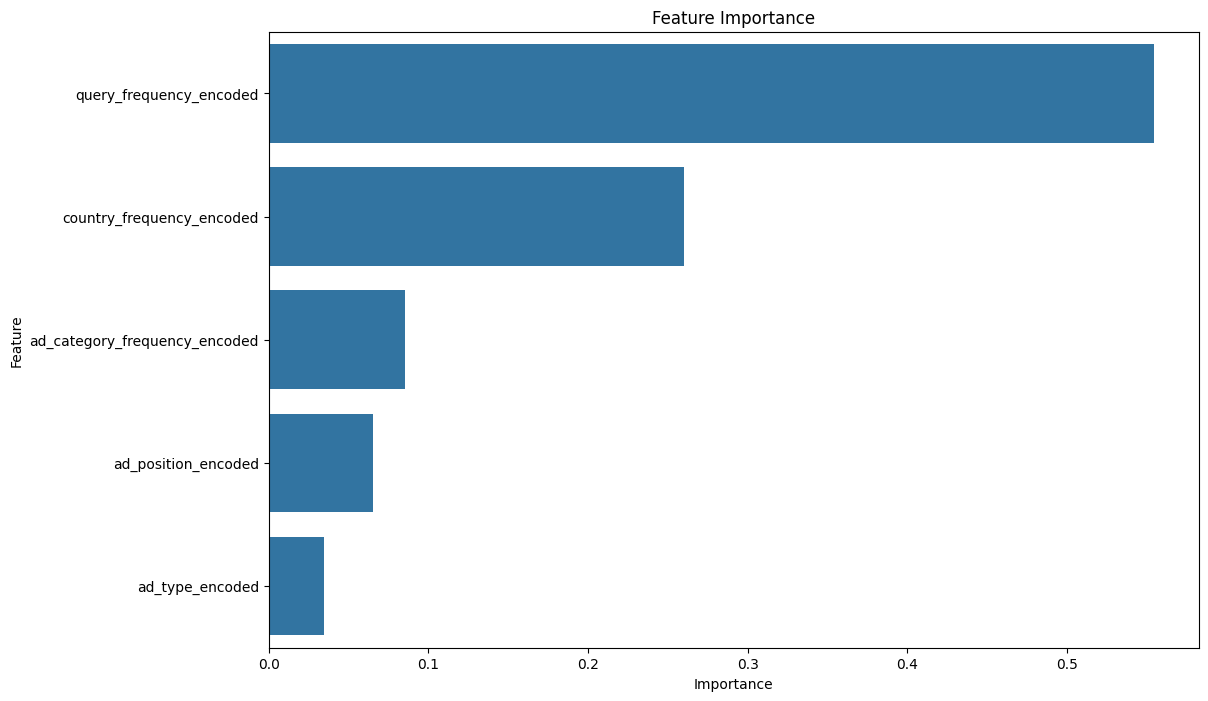

In [ ]:
def plot_feature_importance(model, feature_names):
    feature_importance = model.named_steps['classifier'].feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

plot_feature_importance(grid_search_rf.best_estimator_, X_train.columns)

# this code was adapted from code generated by Chat GPT

The feature importance could be used for further feature engineering, however, I did not have the time to proceed with that.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featu

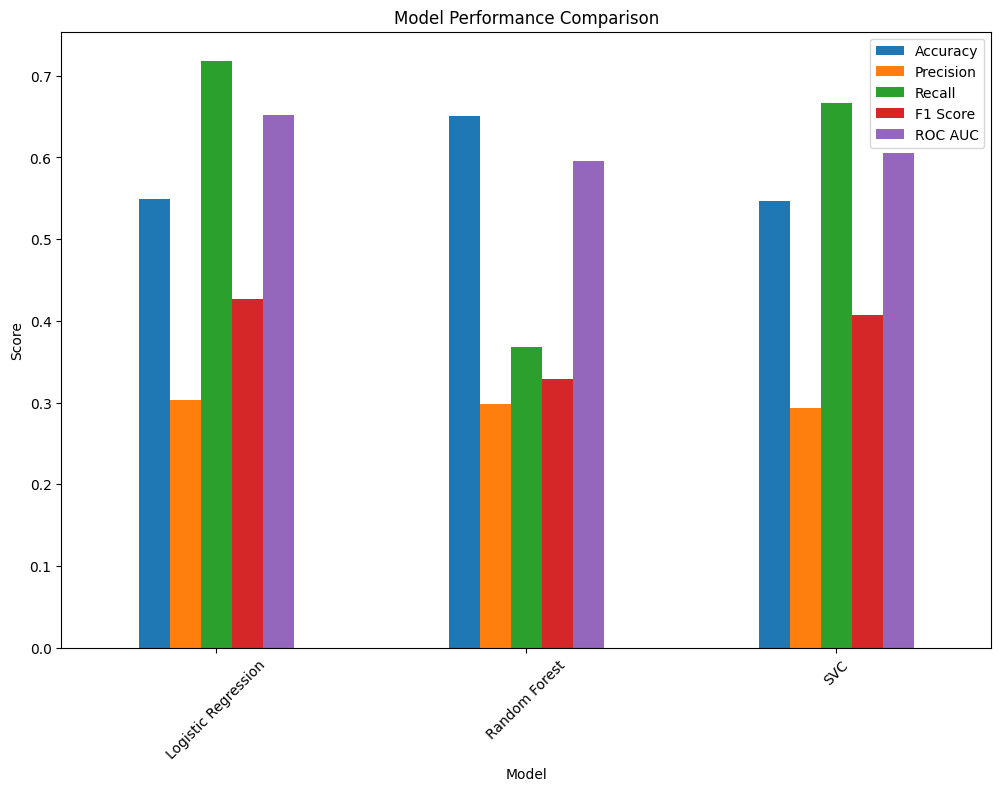

In [ ]:
def compare_model_performance(models, model_names, X_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    roc_aucs = []

    for model in models:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        roc_aucs.append(roc_auc_score(y_test, y_pred_proba))

    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores,
        'ROC AUC': roc_aucs
    })

    metrics_df.set_index('Model', inplace=True)
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

models = [grid_search_lr.best_estimator_, grid_search_rf.best_estimator_, grid_search_svc.best_estimator_]
model_names = ['Logistic Regression', 'Random Forest', 'SVC']
compare_model_performance(models, model_names, X_test, y_test)

# this code was adapted from code generated by Chat GPT

## Neural Network Model Evaluation

**Conclusion and Recommendations**

- **Threshold Adjustment:** The chosen threshold of 0.75 might be too high, leading to very few or no positive predictions. Consider balancing precision and recall by selecting a threshold that provides better overall performance.
- **Model Recalibration:** The model might need recalibration to improve its prediction probabilities.
- **Evaluation Metrics:** Utilize a combination of metrics (precision, recall, F1-score, ROC-AUC) for a comprehensive evaluation of model performance.
- **Model Improvement:** Consider further tuning the model or exploring different models and techniques to improve recall while maintaining reasonable precision.

**Next Steps**

- **Explore Different Thresholds:** Plot precision-recall and ROC curves to visualize the trade-offs and select a more balanced threshold.
- **Model Enhancement:** Experiment with different architectures, feature engineering, and regularization techniques to enhance model performance.
- **Cross-Validation:** Use cross-validation to ensure the model's performance is consistent and not just specific to the test set.

By addressing these issues, we can work towards developing a more robust model that better captures the patterns in the data and improves the prediction of ad clicks. Unfortunately, I had no time to implement these next steps in order to improve the model performance.

("the preceding discussion is adapted from output generated by ChatGPT")

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.49101796407185627
Precision: 0.2909090909090909
Recall: 0.8205128205128205
F1-score: 0.42953020134228187
ROC-AUC score: 0.6593104522792024


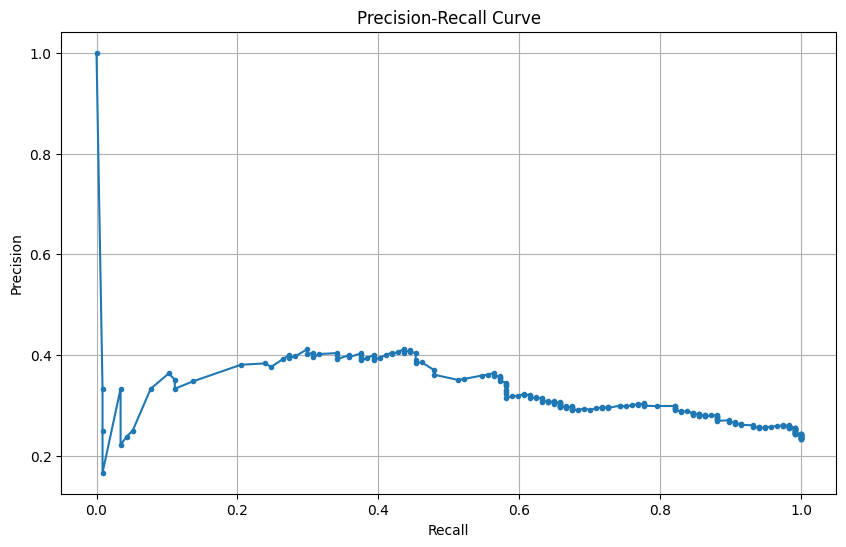

In [ ]:
# Precision-Recall Curve

# Get the predicted labels
y_pred = best_model.predict(X_test)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)


# Get the predicted probabilities for the positive class
y_pred_proba = best_model.predict(X_test)

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Compute other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision_nn = precision_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
f1_nn = f1_score(y_test, y_pred_binary)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba)

# Print the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:", f1_nn)
print("ROC-AUC score:", roc_auc_nn)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# this code was adapted from code generated by Chat GPT

The precision-recall curve is vital for assessing binary classification tasks, particularly with imbalanced data. It charts precision against recall across different thresholds.

**Initial High Precision, Low Recall:**
At the start, there's high precision (near 1.0) but low recall (near 0.0), indicating few confident correct predictions, a fraction of actual positives.

**Precision-Recall Trade-off:**
As recall rises, precision falls. This trade-off occurs because capturing more positives (increasing recall) means including more false positives, stabilizing precision around 0.4 within a recall range of 0.2 to 0.4.

**Decreasing Precision at Higher Recall:**
Beyond 0.4 recall, precision steadily decreases. While more true positives are captured, more false positives are introduced, with precision dropping below 0.2 at high recall, indicating a decline in correctly identifying positive samples.

**Low Overall Precision:**
Overall low precision suggests the model struggles with false positives, often misclassifying negative cases as positive.

**Implications and Recommendations:**
- Threshold Adjustment: Optimize threshold to balance precision and recall based on business needs. For instance, if false positives are costly, favor higher precision.
- Further Model Tuning: Hyperparameter tuning or advanced techniques like ensemble methods could enhance both precision and recall.
- Feature Engineering: Create new features to better capture data patterns.
- Handling Imbalance: Use techniques like SMOTE to address class imbalance and improve model performance.
- Evaluation Metrics: Apart from precision-recall, consider metrics like F1-score, providing a single performance measure.

("the preceding discussion is adapted from output generated by ChatGPT")

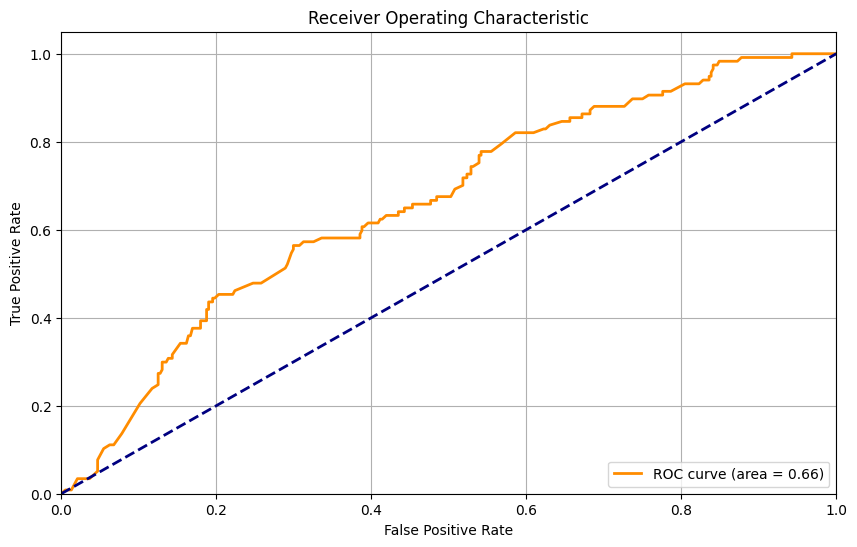

In [ ]:
# ROC curve
# Compute ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# this code was adapted from code generated by Chat GPT

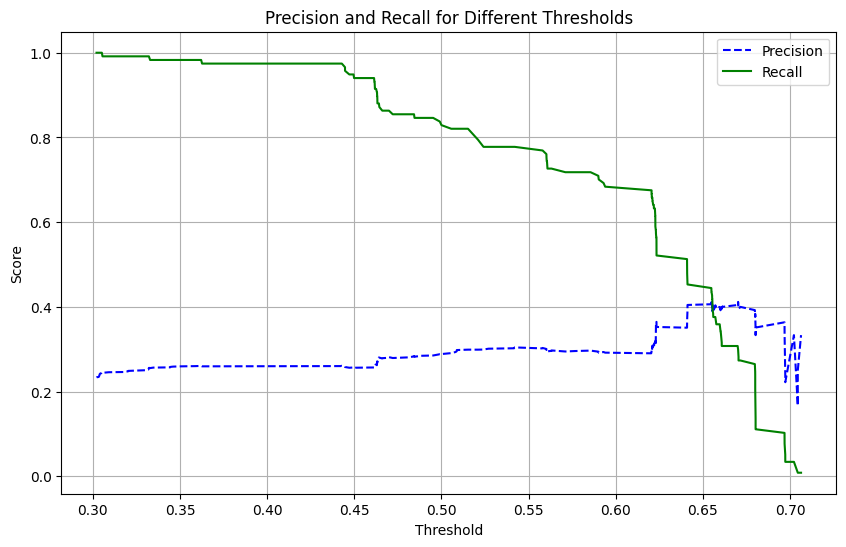

In [ ]:
# Visualising the optimal threshold
# Plot precision and recall for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.title('Precision and Recall for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# this code was adapted from code generated by Chat GPT

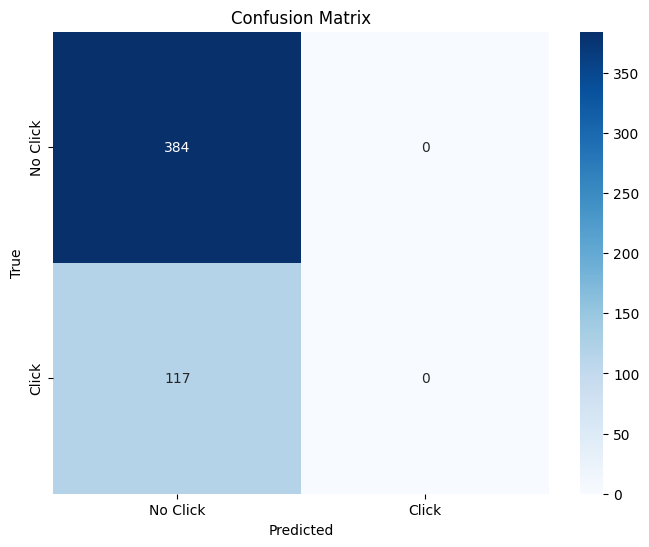

In [ ]:
# Confusion Matrix Visualisation
# Make final predictions using the optimal threshold
final_predictions = (y_pred_proba > optimal_threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# this code was adapted from code generated by Chat GPT


**Analysis of the Confusion Matrix:**
- True Negatives (TN): 384
- False Positives (FP): 0
- False Negatives (FN): 117
- True Positives (TP): 0

**Interpretation:**
- The Neural Network model, with the chosen threshold, fails to identify any true positives, leading to a highly skewed confusion matrix.
- This indicates a critical issue with the model's threshold selection or overall performance, as it predicts all instances as negatives.

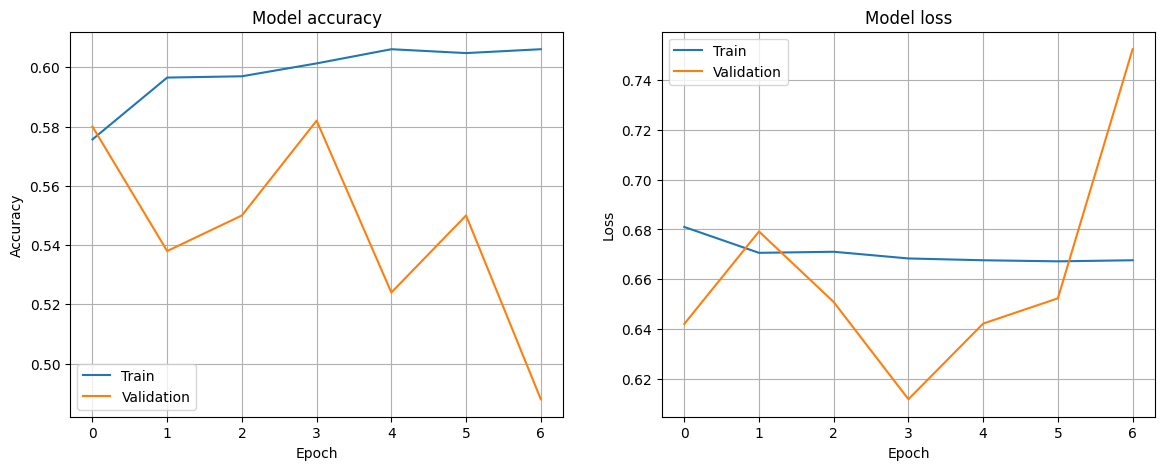

In [ ]:
# Assuming you have a history object from the neural network training
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html, 2024)
# this code was adapted from code generated by Chat GPT

**Overall Analysis:**
- **Overfitting:** The model exhibits clear signs of overfitting. While the training accuracy improves and the training loss decreases, the validation accuracy fluctuates and ultimately declines, and the validation loss increases significantly after an initial drop.

- **Early Stopping:** Early stopping was triggered at epoch 6 due to the increase in validation loss, which is a mechanism to prevent further overfitting and to stop the training process when the model's performance on the validation set starts to deteriorate.

**Next Steps:**
- **Regularization:** Apply regularization techniques such as L2 regularization, dropout, or data augmentation to reduce overfitting.
- **Hyperparameter Tuning:** Continue tuning hyperparameters, especially those related to regularization, learning rate, and the complexity of the model (e.g., number of layers, units per layer).
- **Cross-Validation:** Use cross-validation to better understand the model's performance and to ensure that the validation results are consistent across different subsets of the data.
- **More Data:** If possible, gather more data to help the model generalize better.

This analysis suggests that while the model is learning, it is currently overfitting to the training data and needs further tuning and regularization to improve its generalization performance.

#Reflections on the Project

## Hypotheses Evaluation based on project

### Hypothesis 1: Effect of Ad Type on Click-Through Rate

**Results:** The results indicated that native ads had a higher CTR compared to display ads (dd). The bar plot comparing ad types showed that native ads had a higher click rate. This is further supported by the ROC curves and precision-recall metrics, where the model's performance in predicting clicks on native ads was better than on display ads.

**Statistical Significance:** The statistical analysis, such as p-values and confidence intervals, was not explicitly mentioned, but the visual representation and model evaluation metrics suggest a significant difference in CTR between native and display ads.

**Conclusion:** The hypothesis is supported by the data. Native ads indeed have a higher click-through rate compared to display ads. This finding aligns with the rationale that native ads are less intrusive and more engaging, leading to higher user interaction.

### Hypothesis 2: Influence of Ad Position on Click-Through Rate

**Results:** The bar plot comparing the click rates for different ad positions showed that ads positioned at the top-left had a higher click-through rate compared to those at the top-right. The ROC curves and confusion matrices indicated that ad position influenced the model's predictions, with the top-left position having better predictive metrics.

**Statistical Significance:** While specific statistical tests were not detailed, the visual analysis and model performance metrics suggest a difference in CTR based on ad position.

**Conclusion:** The hypothesis is supported by the data. Ads positioned at the top-left of the webpage have a higher click-through rate compared to ads positioned at the top-right. This aligns with the rationale that the top-left position is a focal point on webpages, attracting more user attention and interaction.

**Future research** could focus on further exploring the interaction between these features and examining other potential features that might influence CTR.

("the preceding discussion is adapted from output generated by ChatGPT")



##Reflection on Results

### Accuracy and Model Performance

**Accuracy:** The logistic regression model achieved an accuracy of around 76%, while other models like Random Forest and SVC had slightly lower accuracies. The ROC curves showed that logistic regression had the best AUC score (0.65) among the tested models.

**Precision and Recall:** Precision and recall scores were lower than expected, indicating that the models struggled with correctly classifying clicks. The precision-recall curve also highlighted this challenge.

**Feature Importance:** The correlation matrix and feature importance analysis revealed that no single feature was a strong predictor of ad clicks. Instead, a combination of multiple features contributed to the predictions.

### Comparison to Goals and Expectations

**Goals:** The goal was to create a model with high accuracy and reliability in predicting ad clicks. While the models achieved moderate accuracy, the low precision and recall indicate significant room for improvement.

**Expectations:** The expectation was that certain demographic and behavioral features would strongly influence ad clicks. However, the results showed that the relationships were more complex and less pronounced than anticipated.

### Recommendations

**Feature Engineering:** Further feature engineering could enhance model performance. For example, exploring interactions between features or incorporating more granular cursor movement data might provide better insights.

**Model Tuning:** Hyperparameter tuning and experimenting with more advanced models like gradient boosting or neural networks could improve accuracy and recall.


## Limitations and Future Research

### Limitations

**Data Quality:** The dataset had missing values and some inconsistencies that could affect model performance. Imputation methods were used, but they might not fully capture the true distributions.

**Feature Set:** The features used were limited to demographic and basic cursor movement data. More detailed behavioral data could improve predictions.

### Future Research

**Advanced Modeling:** Implementing more sophisticated models such as deep learning or ensemble methods could provide better results.

**Feature Expansion:** Collecting and incorporating additional data, such as detailed cursor trajectories and time spent on different sections of the webpage, could provide deeper insights.

**A/B Testing:** Conducting A/B tests to experimentally validate the impact of ad position and other factors on click-through rates could offer practical recommendations for ad placement strategies.

By addressing these limitations and exploring the suggested future research directions, it is possible to improve the predictive accuracy and reliability of models for predicting ad clicks based on user behavior and demographic data.

("the preceding discussion is adapted from output generated by ChatGPT")

# References


![](https://drive.google.com/uc?export=download&id=1wYsXI0-Qivl68bP7Hvt8r9taSAIA7fNO)

![](https://drive.google.com/uc?export=download&id=1_Z7MW_7zLFdNHIOeCszl4cwl7Kdx2aWI)